In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ncr-paper.mplstyle')

In [4]:
from fitting_scripts import *

/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


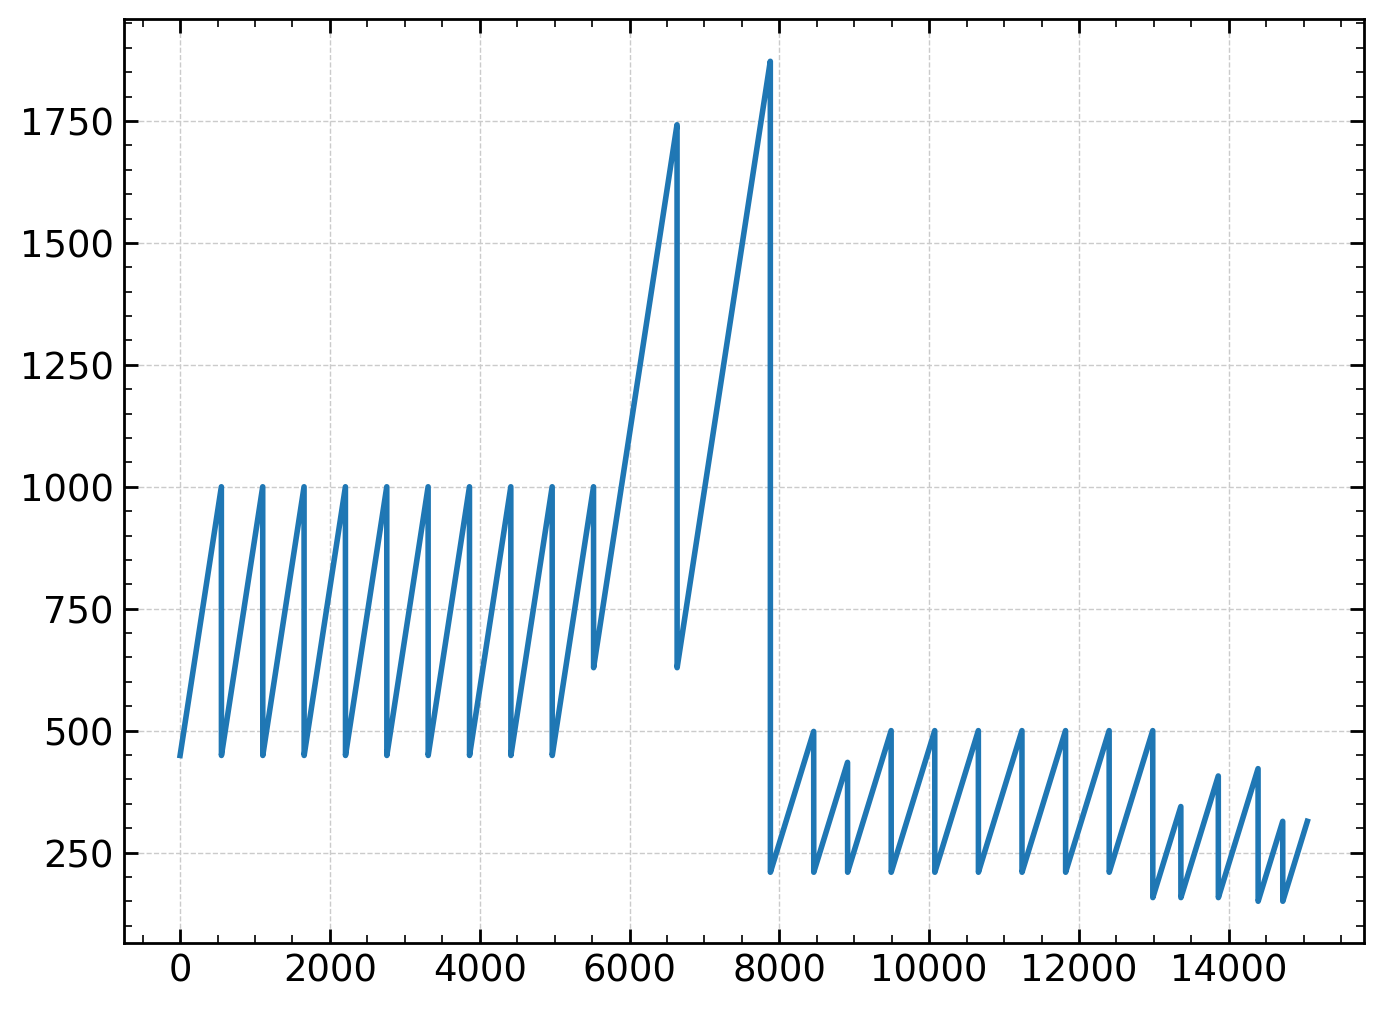

In [5]:
# "pt_df" is a pandas.DataFrame collecting relevant physical quantity time series from
# all simulations into a long-form array
# it will not be straightforward to bundle each model's points from this data
pt_df = pd.read_pickle('points_all.p')
pt_logdf = np.log10(pt_df)

# one can bundle data for each model based on "time_code" field
# that is increasing within each model's data output
plt.plot(pt_df['time_code'])

In [6]:
# "qdset" is a xarray.Dataset storing the (16, 50, 84) percentile values and mean and std for each model's time series into an effectively 3D array.
with xr.open_dataarray('percentiles_all.nc') as qdset:
    # get median values and convert it into pandas.DataFrame
    mid_df = qdset.sel(q='50').to_dataset(dim='variable').drop('q').to_dataframe()
    mid_logdf = np.log10(mid_df)

In [7]:
# these are all quantity name stored in this data
# we are mostly interested in fitting "Yxxx" as a function of "W" and "Zgas"
print(qdset['variable'])

<xarray.DataArray 'variable' (variable: 97)>
array(['Ptot', 'Ytot', 'Ptot_top', 'dPtot', 'Pturb', 'Yturb', 'Pturb_top',
       'dPturb', 'Pth', 'Yth', 'Pth_top', 'dPth', 'Pimag', 'Ymag', 'Pimag_top',
       'dPimag', 'oPimag', 'oYmag', 'oPimag_top', 'doPimag', 'dYmag',
       'dPimag_top', 'ddPimag', 'Prad', 'Yrad', 'Prad_top', 'dPrad',
       'Ptot_hot', 'Ytot_hot', 'Ptot_hot_top', 'dPtot_hot', 'Pturb_hot',
       'Yturb_hot', 'Pturb_hot_top', 'dPturb_hot', 'Pth_hot', 'Yth_hot',
       'Pth_hot_top', 'dPth_hot', 'Pimag_hot', 'Ymag_hot', 'Pimag_hot_top',
       'dPimag_hot', 'oPimag_hot', 'oYmag_hot', 'oPimag_hot_top',
       'doPimag_hot', 'dYmag_hot', 'dPimag_hot_top', 'ddPimag_hot', 'Prad_hot',
       'Yrad_hot', 'Prad_hot_top', 'dPrad_hot', 'Ynonth', 'nH',
       'sigma_eff_mid', 'sigma_eff', 'sigma_turb_mid', 'sigma_turb',
       'sigma_th_mid', 'sigma_th', 'H', 'PDE_whole_approx',
       'PDE_2p_avg_approx', 'PDE_2p_mid_approx', 'PDE_whole_approx_sp',
       'PDE_2p_avg_approx_sp

In [8]:
qdset['name']

<xarray.DataArray 'name' (name: 26)>
array(['R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0',
       'R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0',
       'R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0',
       'R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0',
       'R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0',
       'R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0',
       'R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0',
       'R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0',
       'R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0',
       'R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0',
       'LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0',
       'LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0',
       'LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01',
       'LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8',
       'LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8',
       'LGR4_4pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR4_4pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8',
       'LGR4_4pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy2048.eps1.e-8',
       'LGR4_4pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR4_4pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy2048.eps1.e-8',
       'LGR2_4pc_NCR_S150.full.b2.Om02.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01',
       'LGR2_4pc_NCR_S150.full.b2.Om02.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8',
       'LGR2_4pc_NCR_S150.full.b2.Om02.v3.iCR5.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR2_4pc_NCR_S150.full.b2.Om01.q0.v3.iCR5.Zg0.1.Zd0.1.xy2048.eps1.e-8',
       'LGR2_4pc_NCR_S150.full.b2.Om01.q0.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8'],
      dtype=object)
Coordinates:
  * name     (name) object 'R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps...

In [9]:
# nsel=[]
# for n in qdset['name'].data:
#     if ('R8_8pc_NCR.full.b10' in n or
#         'LGR4_4pc_NCR.full.b10' in n or
#         'rstZ01' in n):
#         print(n)
#     else:
#         nsel.append(n)

In [10]:
# qdset = qdset.sel(name=nsel)

# fitting with mean and std

In [11]:
from matplotlib.lines import Line2D

In [12]:
# We are fitting variables as a function of "W" and "Zgas"
# I set the parameter range of interest (in log scale) here
Zmin=-1.3
Zmax=0.3
Wmin=2.7
Wmax=6.3

In [14]:
# setup figure output directory
outdir = './lowZ-figures-nolegend/'
outdir = './lowZ-figures-mean/'
os.makedirs(outdir,exist_ok=True)
# outdir = '/tigress/changgoo/public_html/TIGRESS-NCR/lowZ-figures/'

Beta: [4.17345708 1.18929957 0.0197935 ]
Beta Std Error: [0.03132651 0.02678911 0.03669419]
Beta Covariance: [[ 0.31219377 -0.154523    0.24760896]
 [-0.154523    0.22830564 -0.04119495]
 [ 0.24760896 -0.04119495  0.42834613]]
Residual Variance: 0.003143401215805825
Inverse Condition #: 0.0417098205353623
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.13992886305821267
L2 : 0.19276914269747317


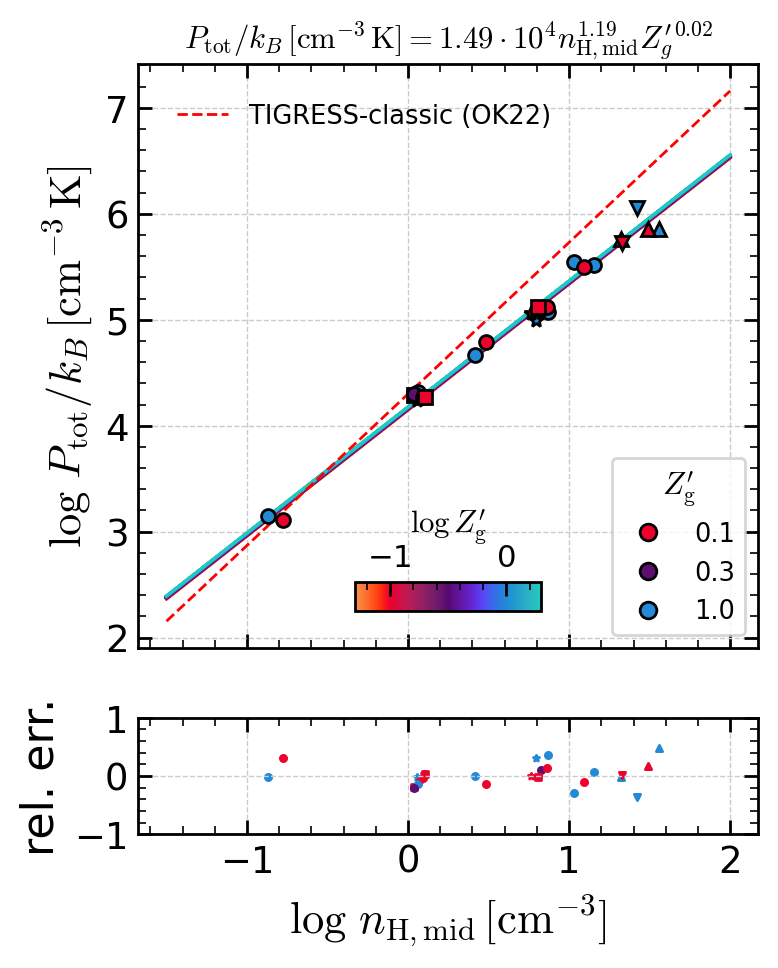

In [61]:
# Figure for the effective Equation of State (eEOS)
fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

# set field names for x-axes and yaxis
# here we fit Ptot as a function of nH and Zgas
x1,x2,yf=['nH','Zgas','Ptot']

# linear regression
odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=-1.5,Wmax=2,dims=[x2,x1])

# plot simulation data along with fitting result
plt.sca(axes[0])
# write fitting result as the axis title
a=odr_out.beta[1]
b=odr_out.beta[2]
Y0=10**odr_out.beta[0]
tit=labels[yf]+f'$={scifmt(Y0)} n_{{\\rm H,mid}}^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
plt.title(tit,fontsize='x-small')

# call plotting script
plot_fitting_mean(qdset,model_dset,x1,yf,legend=4,colorbar=8,model=True)
# plot all data as grey dots
# plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
plt.xlabel('')

# plot residual compared with the fitting result
plt.sca(axes[1])
plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,model=True)

# add reference line from the previous result (Ostriker & Kim 2022 Eq 27, Figure 14)
nH=model_dset.nH.data
plt.sca(axes[0])
plt.plot(nH,4.3+nH*1.43,ls='--',color='r',lw=1)
leg1=plt.gca().get_legend()
custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,['TIGRESS-classic (OK22)'],loc=2,borderpad=1,fontsize='xx-small',frameon=False)
plt.gca().add_artist(leg1)

# decorate axis
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

# save figure
plt.savefig(os.path.join(outdir,'eEOS_fit.png'),bbox_inches='tight')

Beta: [0.60903586 0.11697894 0.04283701]
Beta Std Error: [0.05109169 0.01017369 0.01596404]
Beta Covariance: [[ 1.83493178 -0.35659102  0.15444818]
 [-0.35659102  0.07275722 -0.0126735 ]
 [ 0.15444818 -0.0126735   0.1791451 ]]
Residual Variance: 0.0014225926950423625
Inverse Condition #: 0.0032222906221710383
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.0634758879938327
L2 : 0.0816053528332032
Beta: [0.61750282 0.08741662 0.0157855 ]
Beta Std Error: [0.06556018 0.01305452 0.02048468]
Beta Covariance: [[ 1.82128514 -0.35393276  0.15333259]
 [-0.35393276  0.07221364 -0.01258549]
 [ 0.15333259 -0.01258549  0.17781004]]
Residual Variance: 0.0023599471093885575
Inverse Condition #: 0.0032221616135547637
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.07425802040271473
L2 : 0.1027070501718118
Beta: [0.41341224 0.1170067  0.09673918]
Beta Std Error: [0.19308927 0.0384513  0.0603465 ]
Beta Covariance: [[ 1.84894654 -0.35933254  0.15544896]
 [-0.35933254  0.07332131 -0.

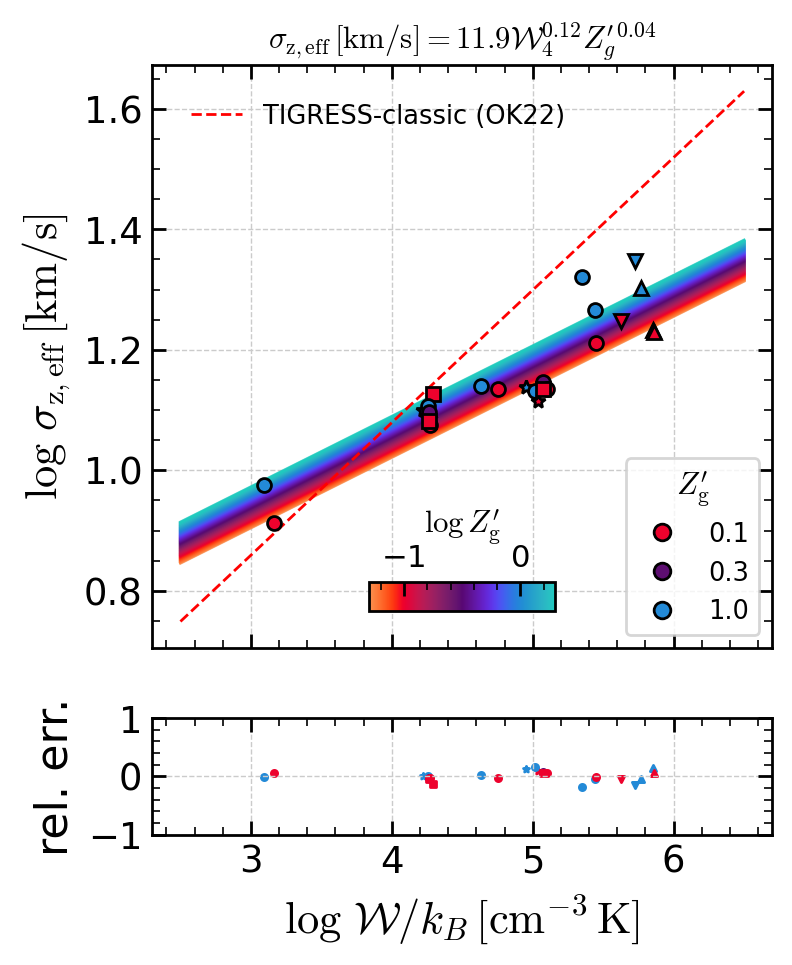

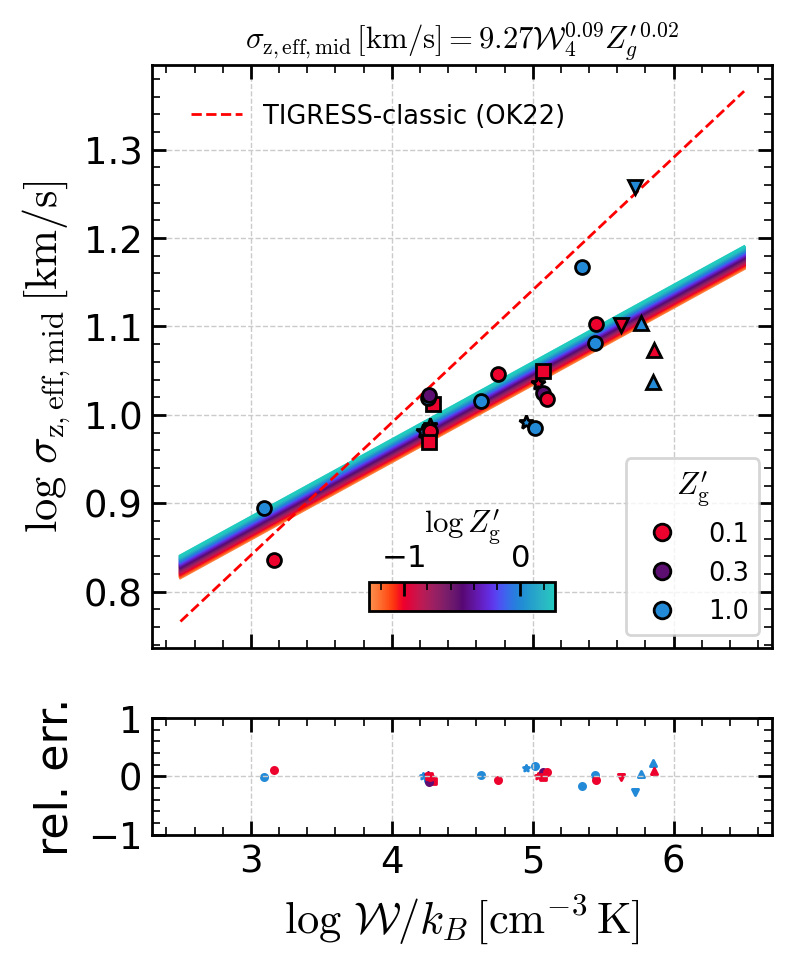

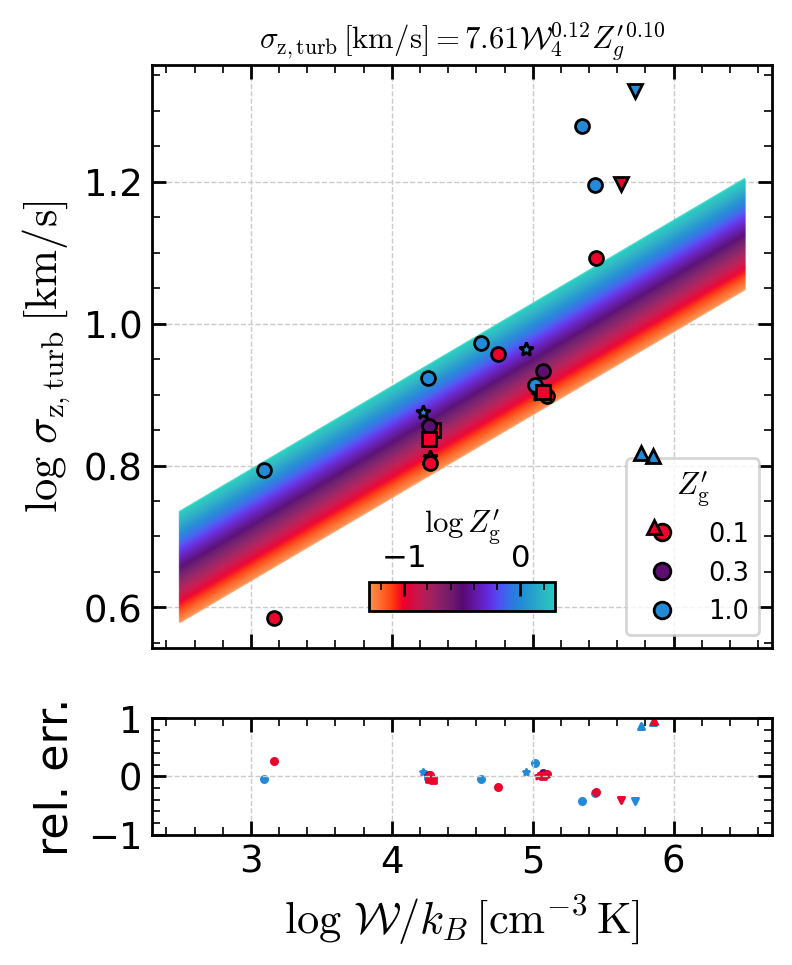

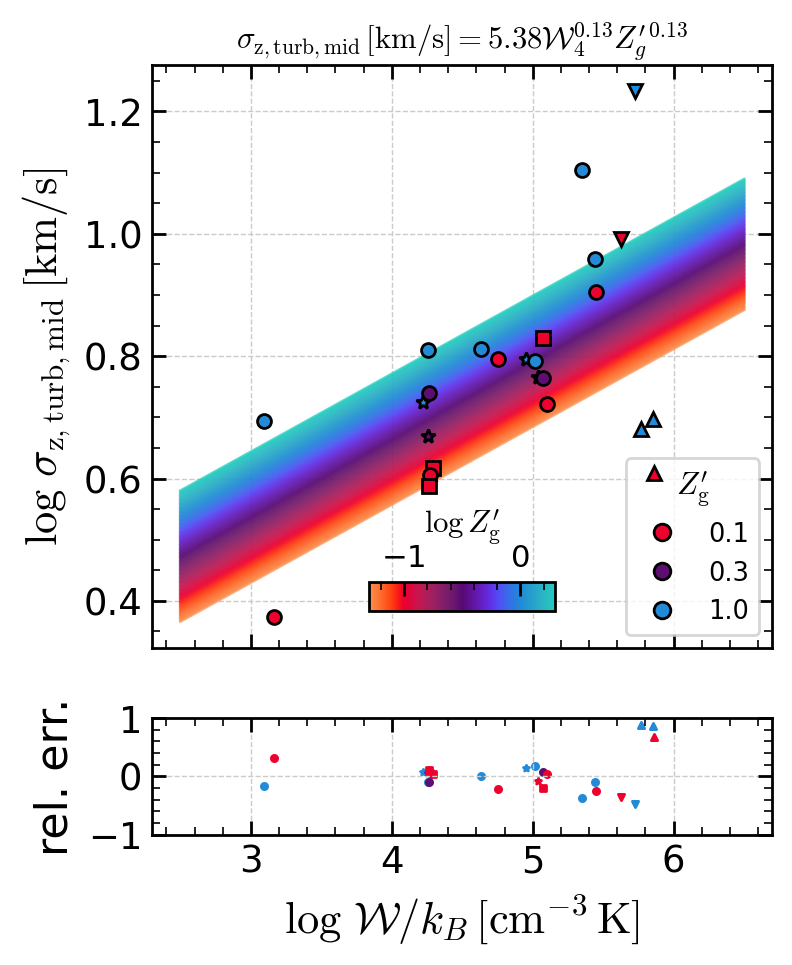

In [62]:
# Figure for the velocity dispersions
for yf in ['sigma_eff','sigma_eff_mid','sigma_turb','sigma_turb_mid']:
    fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

    # set field names for x-axes and yaxis
    # here we fit Ptot as a function of nH and Zgas
    x1,x2=['W','Zgas']

    # linear regression
    odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
    # construct model (not the x1-axis is not W and the parameter range is changed)
    model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,dims=[x2,x1])

    # plot simulation data along with fitting result
    plt.sca(axes[0])
    # write fitting result as the axis title
    a=odr_out.beta[1]
    b=odr_out.beta[2]
    Y0=10**odr_out.beta[0]*1.e4**a
    tit=labels[yf]+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
    plt.title(tit,fontsize='x-small')

    # call plotting script
    plot_fitting_mean(qdset,model_dset,x1,yf,legend=4,colorbar=8,model=True)
    # plot all data as grey dots
    # plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
    plt.xlabel('')

    # plot residual compared with the fitting result
    plt.sca(axes[1])
    plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,model=True)

    # add reference line from the previous result (Ostriker & Kim 2022 Eq 27, Figure 14)
    W=model_dset.W.data
    plt.sca(axes[0])
    # plt.plot(W,np.log10(9.05)+0.08*(W-4),ls='--',color='r',lw=1)
    if 'turb' not in yf:
        if 'mid' in yf:
            plt.plot(W,np.log10(9.8)+0.15*(W-4),ls='--',color='r',lw=1)
        else:
            plt.plot(W,np.log10(12)+0.22*(W-4),ls='--',color='r',lw=1)
        leg1=plt.gca().get_legend()
        custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
        leg2 = plt.legend(custom_lines2,['TIGRESS-classic (OK22)'],loc=2,borderpad=1,fontsize='xx-small',frameon=False)
        plt.gca().add_artist(leg1)

    # decorate axis
    fig.axes[-1].xaxis.set_ticks_position('top')
    fig.axes[-1].xaxis.set_label_position('top')
    plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
    fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

    # save figure
    plt.savefig(os.path.join(outdir,f'{yf}_fit.png'),bbox_inches='tight')

Beta: [-0.10158242  1.03647142  0.05385291]
Beta Std Error: [0.08794087 0.01751203 0.02745631]
Beta Covariance: [[ 3.75937301 -0.73063401  0.31605986]
 [-0.73063401  0.14907566 -0.0259482 ]
 [ 0.31605986 -0.0259482   0.36645293]]
Residual Variance: 0.002057150448995789
Inverse Condition #: 0.0032198849051120384
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.14068531068989745
L2 : 0.26567664628139515
Beta: [-0.03296739  0.99720348  0.00944245]
Beta Std Error: [0.07679376 0.01529204 0.02397988]
Beta Covariance: [[ 3.60855221 -0.7013059   0.30352475]
 [-0.7013059   0.14309094 -0.02492413]
 [ 0.30352475 -0.02492413  0.35186414]]
Residual Variance: 0.0016342513801973558
Inverse Condition #: 0.0032203687894681917
Reason(s) for Halting:
  Sum of squares convergence


L1 : 0.12892590851699676
L2 : 0.15235155971145461
Beta: [ 0.35201934  0.91736117 -0.05201662]
Beta Std Error: [0.05599656 0.01115025 0.01749089]
Beta Covariance: [[ 3.33487964 -0.6480861   0.2807236 ]
 [-0.6480861   0.13222893 -0.02305948]
 [ 0.2807236  -0.02305948  0.32537296]]
Residual Variance: 0.0009402481560606968
Inverse Condition #: 0.003221047015267678
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.13827117837541733
L2 : 0.16675487305314393


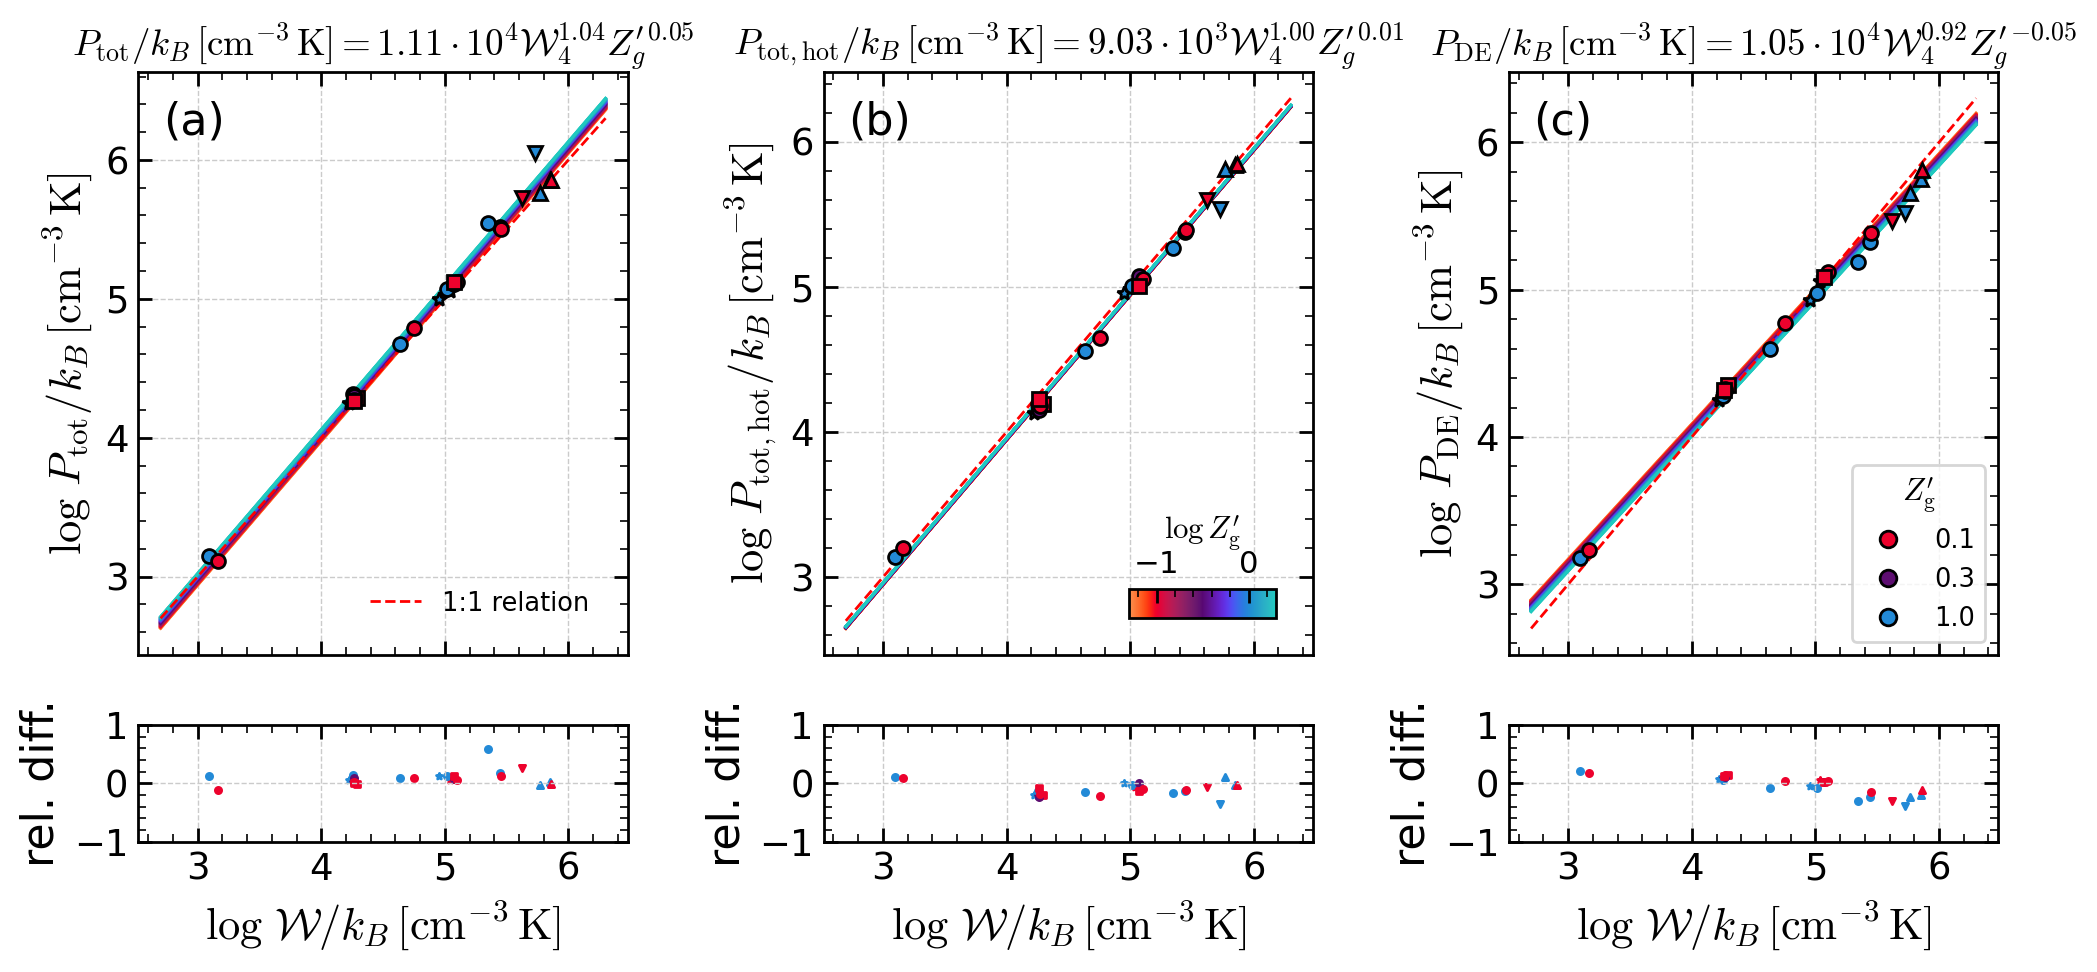

In [33]:
# Figure for
# (a) vertical dynamical equilibrium (Ptot vs W)
# (b) pressure equilibrium between phases (Ptot_hot vs W)
# (c) comparison with analytic weight estimator (PDE from Equation 7 in Ostriker & Kim 2022 vs W)
fig,axes_ = plt.subplots(2,3,sharex='col',figsize=(12,5),
                         gridspec_kw=dict(height_ratios=[1,0.2],wspace=0.4,hspace=0.2))

# set field names for x-axes
x1,x2=['W','Zgas']
for yf,axes in zip(['Ptot','Ptot_hot','PDE_2p_avg_approx'],axes_.T):
    # linear regression
    odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
    # construct model (not the x1-axis is not W and the parameter range is changed)
    model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

    # plot simulation data along with fitting result
    plt.sca(axes[0])

    # write fitting result as the axis title
    a=odr_out.beta[1]
    b=odr_out.beta[2]
    Y0=10**odr_out.beta[0]*1.e4**a
    l = labels[yf] if yf in labels else labels['PDE']
    tit=l+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
    plt.title(tit,fontsize='small')

    # call plotting script
    sm = plot_fitting_mean(qdset,model_dset,x1,yf,
                             legend=4 if yf.startswith('PDE') else 0,
                             colorbar=4 if yf.startswith('Ptot_hot') else 0,
                             model=True)
    # plot one-to-one line
    plt.plot(model_dset.W,model_dset.W,lw=1,ls='--',color='r')
    # plot all data points as grey dots
    # plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
    plt.xlabel('')
    # plt.ylim(3.e2,3.e6)

    # plot residual by comparing x and y field (not comparing with model; model = False)
    plt.sca(axes[1])
    plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,
                      model=False)

# decorate figure
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

# add custom legend
plt.sca(axes_[0,0])
custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,['1:1 relation'],loc=4,borderpad=1,fontsize='xx-small',frameon=False)

# add panel label (a), (b), ...
add_panel_labels(axes_[0,:])

# save figure
plt.savefig(os.path.join(outdir,'PW_fit.png'),bbox_inches='tight')

Beta: [-0.10158242  1.03647142  0.05385291]
Beta Std Error: [0.08794087 0.01751203 0.02745631]
Beta Covariance: [[ 3.75937301 -0.73063401  0.31605986]
 [-0.73063401  0.14907566 -0.0259482 ]
 [ 0.31605986 -0.0259482   0.36645293]]
Residual Variance: 0.002057150448995789
Inverse Condition #: 0.0032198849051120384
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.14068531068989745
L2 : 0.26567664628139515
Beta: [-0.03296739  0.99720348  0.00944245]
Beta Std Error: [0.07679376 0.01529204 0.02397988]
Beta Covariance: [[ 3.60855221 -0.7013059   0.30352475]
 [-0.7013059   0.14309094 -0.02492413]
 [ 0.30352475 -0.02492413  0.35186414]]
Residual Variance: 0.0016342513801973558
Inverse Condition #: 0.0032203687894681917
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.12892590851699676
L2 : 0.15235155971145461
Beta: [ 0.26128429  0.94515419 -0.03040737]
Beta Std Error: [0.03128949 0.00623044 0.00977559]
Beta Covariance: [[ 3.42374129 -0.66534288  0.28823443]
 [-0.66534288  0.1

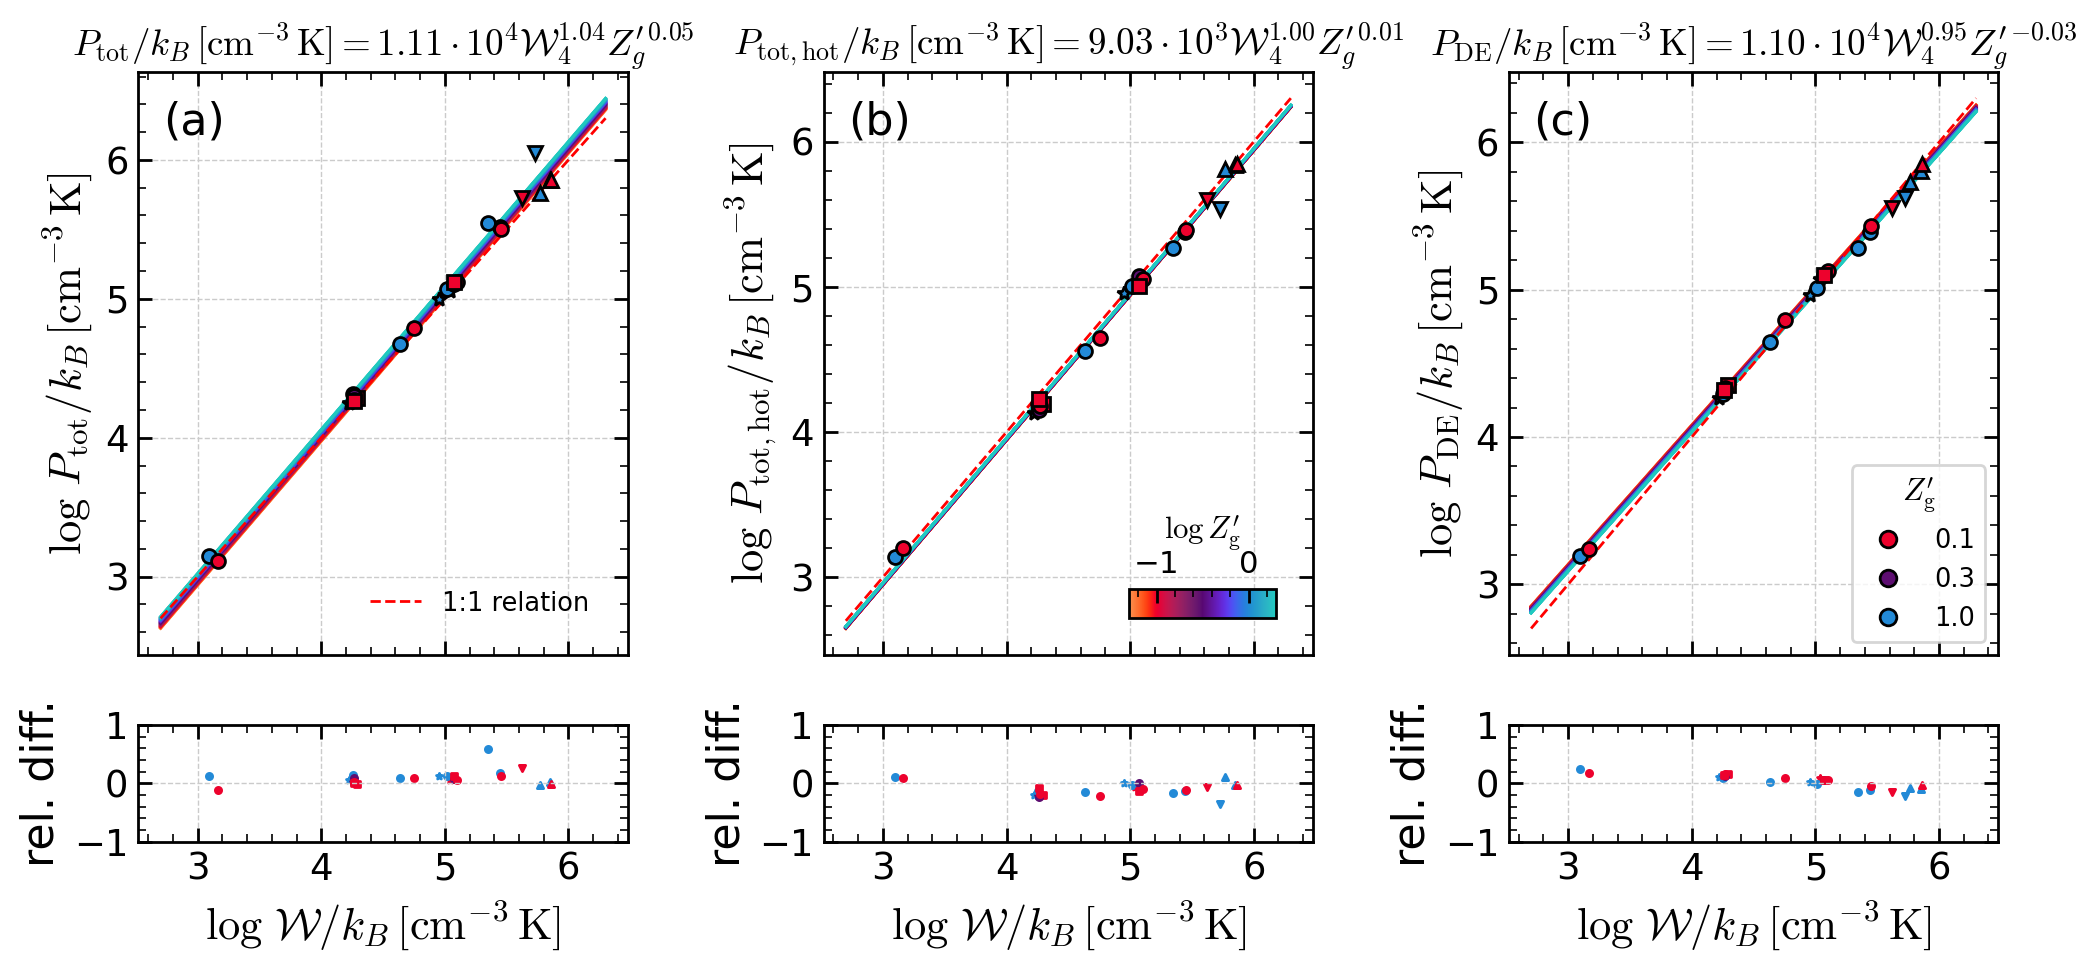

In [34]:
# Figure for
# (a) vertical dynamical equilibrium (Ptot vs W)
# (b) pressure equilibrium between phases (Ptot_hot vs W)
# (c) comparison with analytic weight estimator (PDE from Equation 7 in Ostriker & Kim 2022 vs W)
fig,axes_ = plt.subplots(2,3,sharex='col',figsize=(12,5),
                         gridspec_kw=dict(height_ratios=[1,0.2],wspace=0.4,hspace=0.2))

# set field names for x-axes
x1,x2=['W','Zgas']
for yf,axes in zip(['Ptot','Ptot_hot','PDE_2p_avg_approx_sp'],axes_.T):
    # linear regression
    odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
    # construct model (not the x1-axis is not W and the parameter range is changed)
    model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

    # plot simulation data along with fitting result
    plt.sca(axes[0])

    # write fitting result as the axis title
    a=odr_out.beta[1]
    b=odr_out.beta[2]
    Y0=10**odr_out.beta[0]*1.e4**a
    l = labels[yf] if yf in labels else labels['PDE']
    tit=l+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
    plt.title(tit,fontsize='small')

    # call plotting script
    sm = plot_fitting_mean(qdset,model_dset,x1,yf,
                             legend=4 if yf.startswith('PDE') else 0,
                             colorbar=4 if yf.startswith('Ptot_hot') else 0,
                             model=True)
    # plot one-to-one line
    plt.plot(model_dset.W,model_dset.W,lw=1,ls='--',color='r')
    # plot all data points as grey dots
    # plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
    plt.xlabel('')
    # plt.ylim(3.e2,3.e6)

    # plot residual by comparing x and y field (not comparing with model; model = False)
    plt.sca(axes[1])
    plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,
                      model=False)

# decorate figure
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

# add custom legend
plt.sca(axes_[0,0])
custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,['1:1 relation'],loc=4,borderpad=1,fontsize='xx-small',frameon=False)

# add panel label (a), (b), ...
add_panel_labels(axes_[0,:])

# save figure
plt.savefig(os.path.join(outdir,'PW_fit_sp.png'),bbox_inches='tight')

Beta: [ 4.76023829 -0.35194862 -0.32422183]
Beta Std Error: [0.23024856 0.04588067 0.07214993]
Beta Covariance: [[ 2.22381057 -0.43243225  0.18479743]
 [-0.43243225  0.08830056 -0.01472713]
 [ 0.18479743 -0.01472713  0.21836132]]
Residual Variance: 0.023839441040998246
Inverse Condition #: 0.003224528195351696
Reason(s) for Halting:
  Sum of squares convergence
Ytot
L1 : 0.32188811228033976
L2 : 0.41845627209769876
Beta: [ 4.77950412 -0.52648525 -0.59328964]
Beta Std Error: [0.15702443 0.03128173 0.04920877]
Beta Covariance: [[ 2.94562411 -0.57264484  0.24605037]
 [-0.57264484  0.11690266 -0.01976627]
 [ 0.24605037 -0.01976627  0.28928627]]
Residual Variance: 0.008370610588845582
Inverse Condition #: 0.0032243212459416837
Reason(s) for Halting:
  Sum of squares convergence
Yth
L1 : 0.20756685181884987
L2 : 0.2906420572459521
Beta: [ 4.0124702  -0.27816591 -0.07078255]
Beta Std Error: [0.2684712  0.05347704 0.08376483]
Beta Covariance: [[ 1.96225362 -0.38148541  0.16400273]
 [-0.3814854

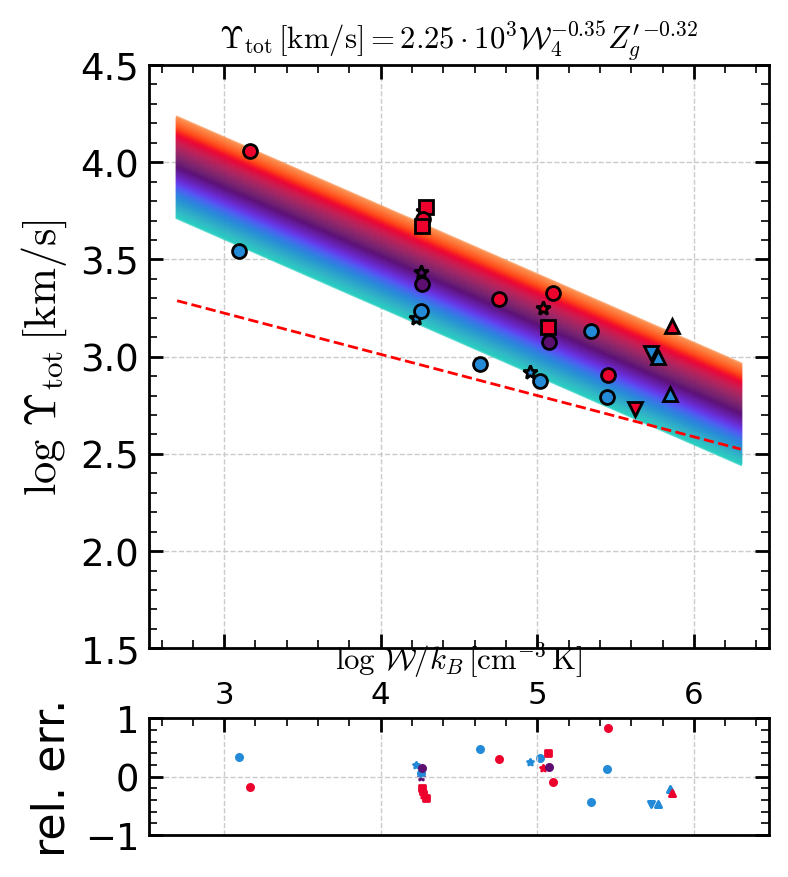

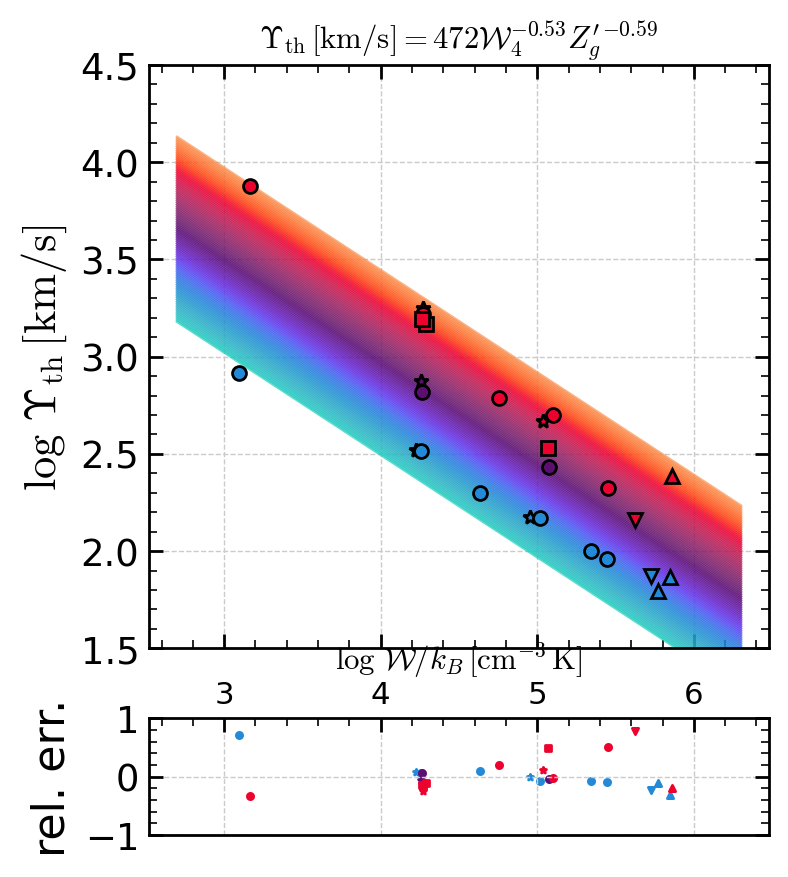

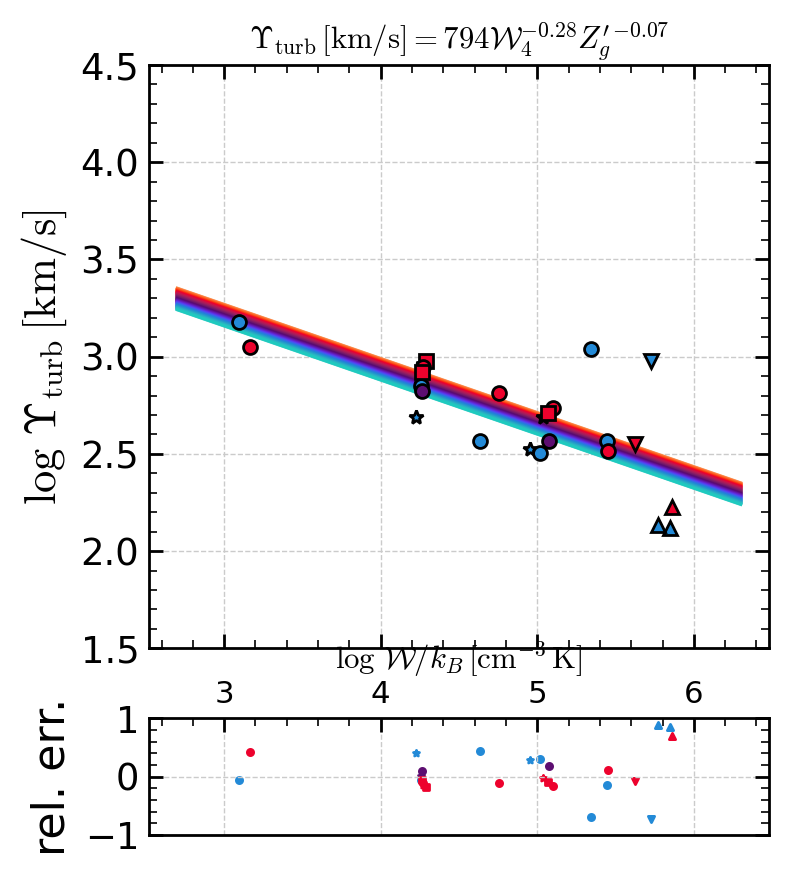

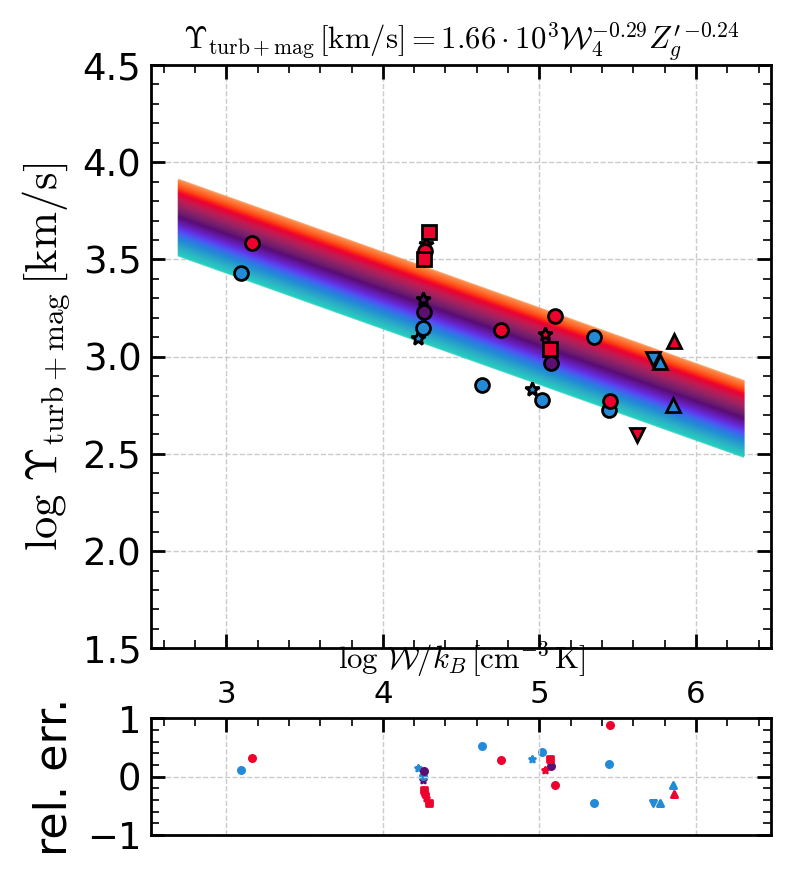

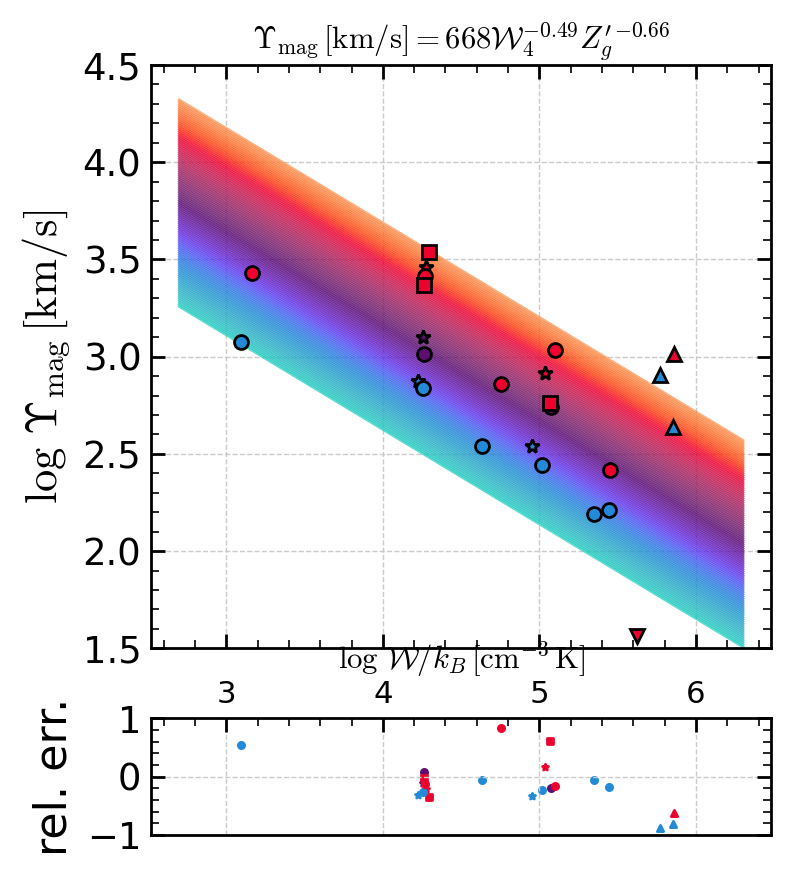

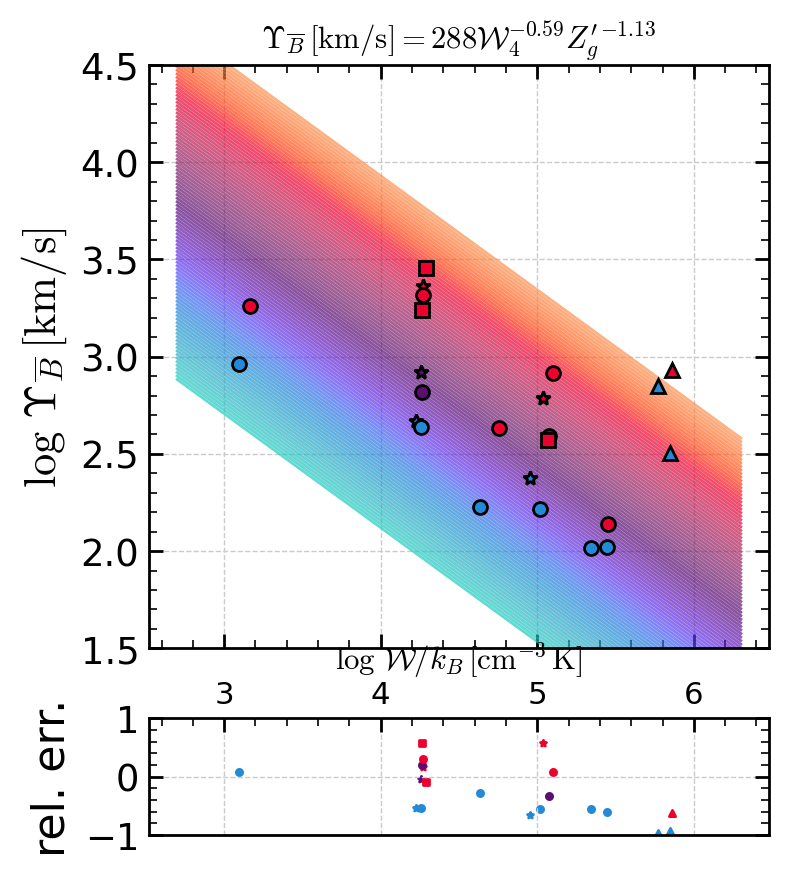

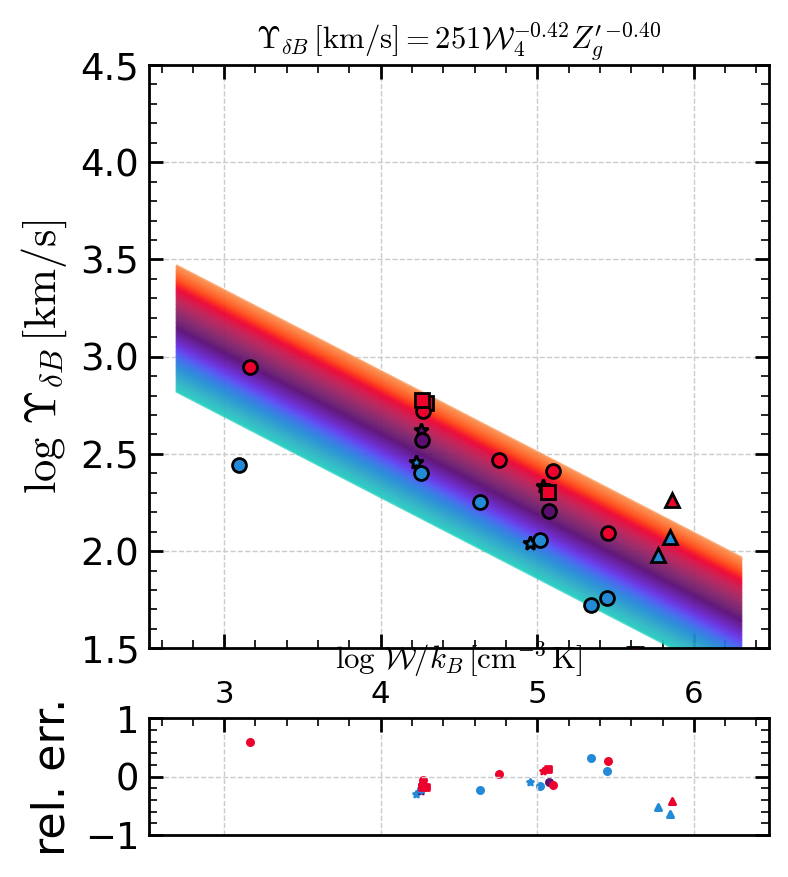

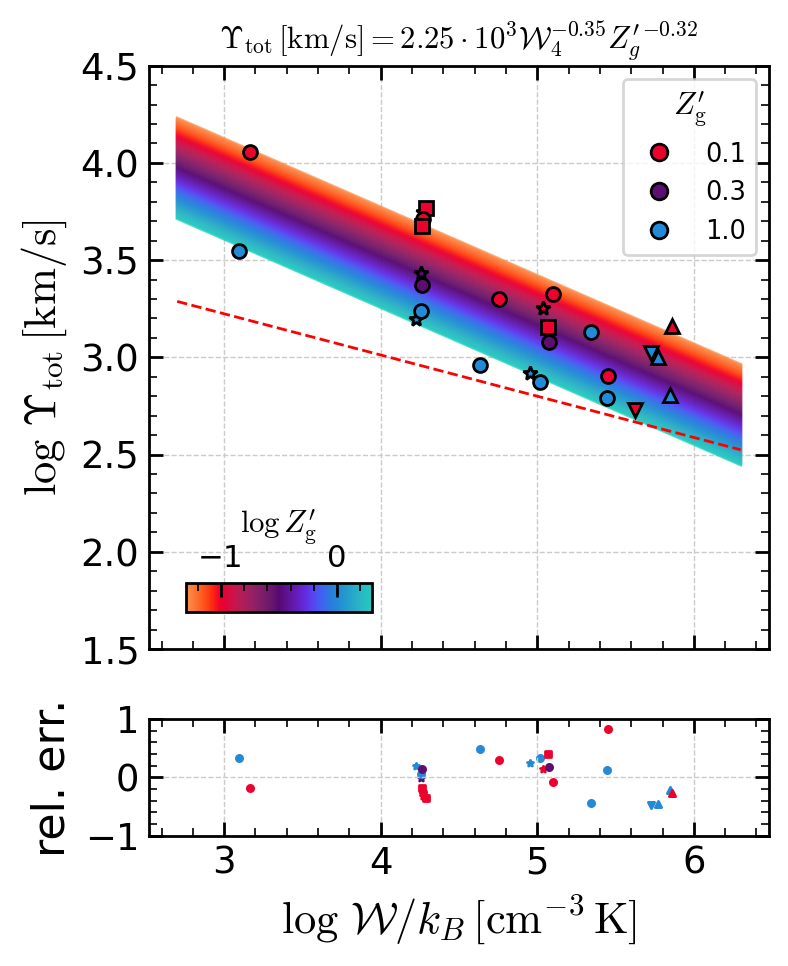

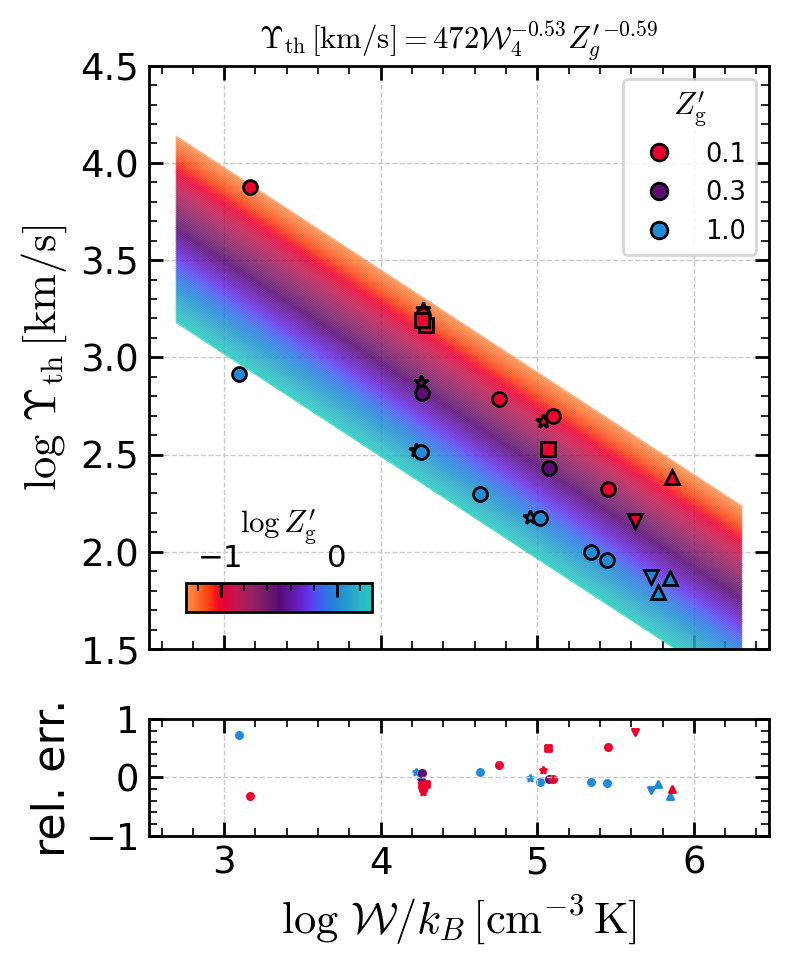

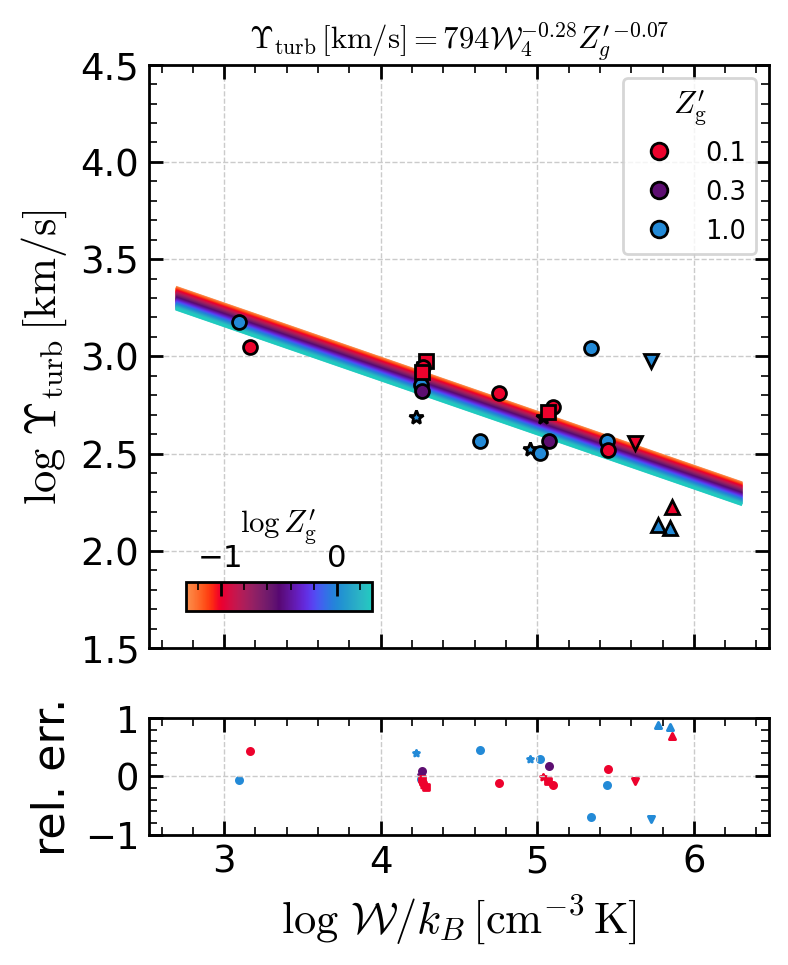

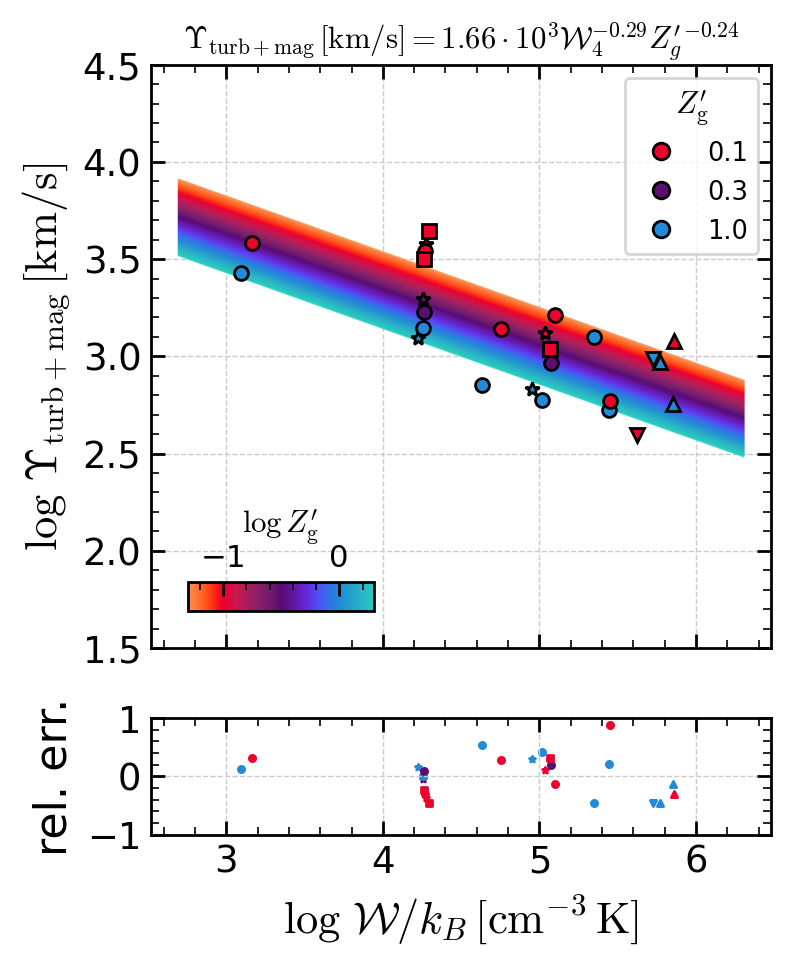

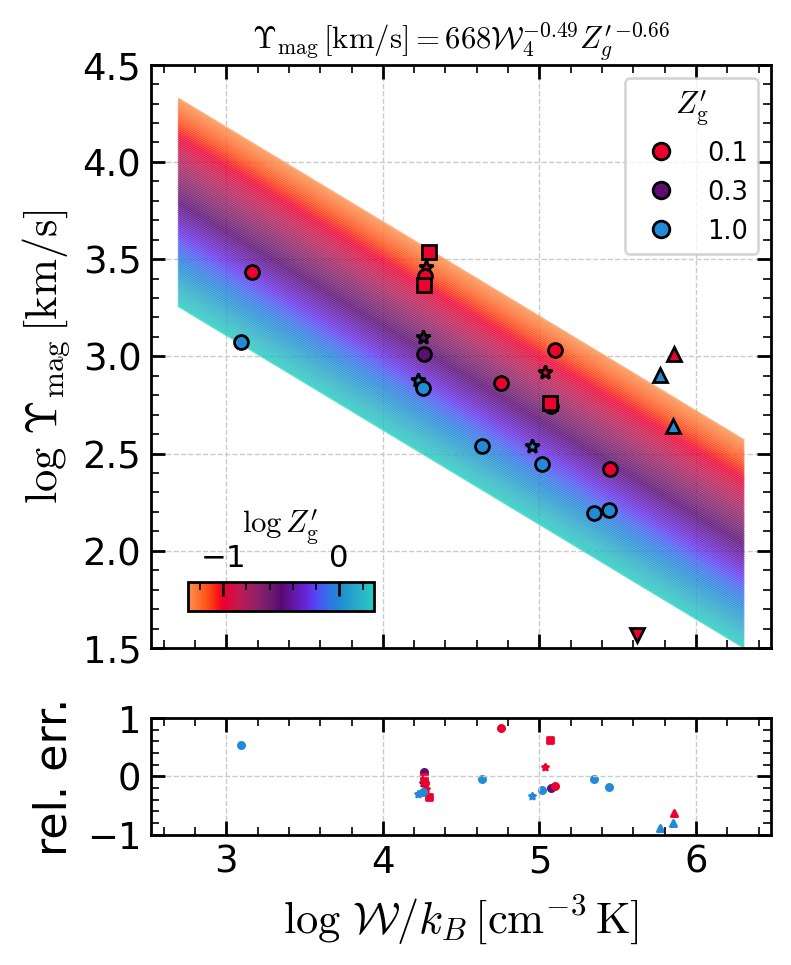

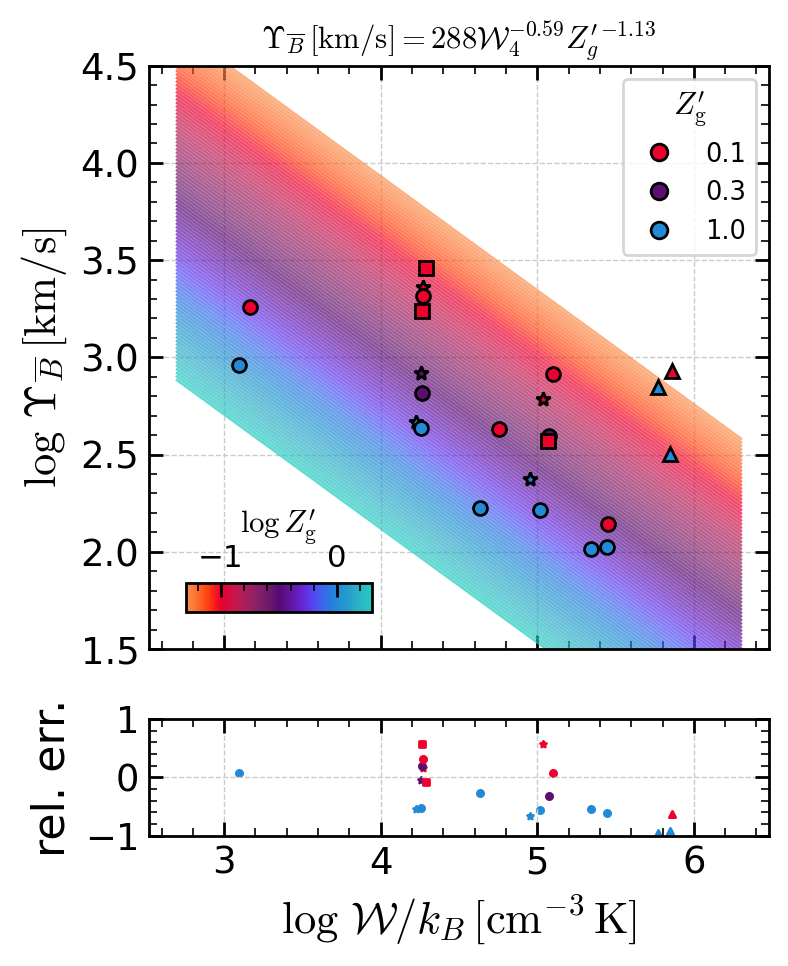

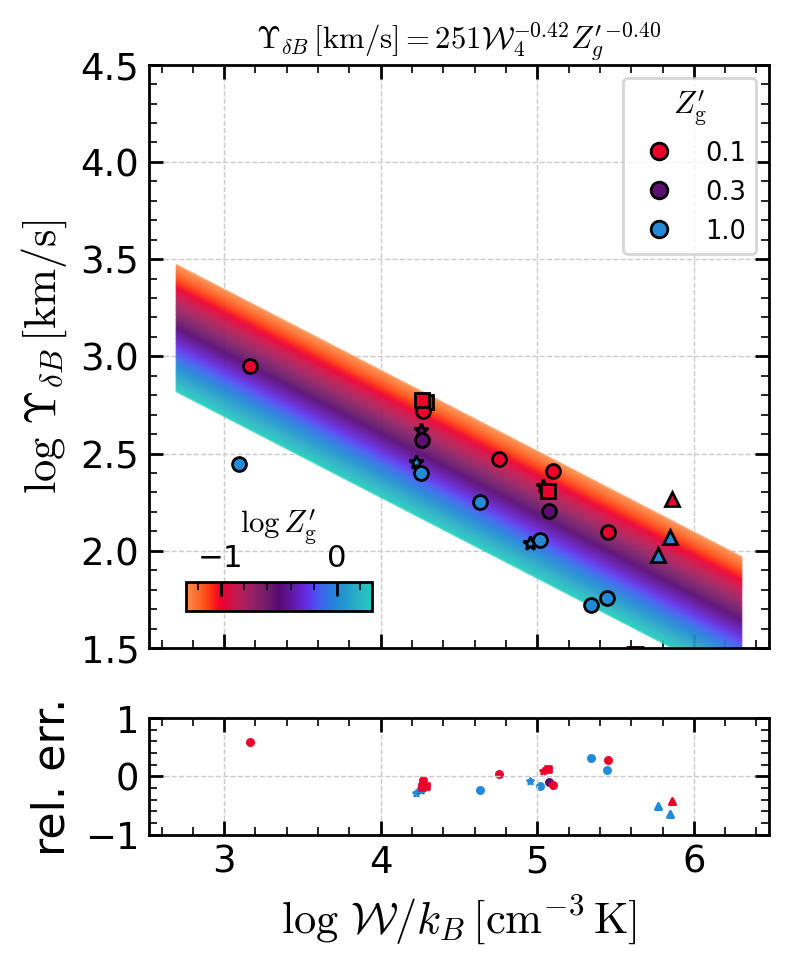

In [16]:
# Figure for feedback yields (each component saved into each figure)
for outdir in ['./lowZ-figures-nolegend/','./lowZ-figures-mean/']:
    for yf in ['Ytot','Yth','Yturb','Ynonth','Ymag','oYmag','dYmag']:
        fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

        # set field names for x-axes and yaxis
        x1,x2=['W','Zgas']

        # linear regression
        odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
        # construct model (not the x1-axis is not W and the parameter range is changed)
        model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

        # plot simulation data along with fitting result
        plt.sca(axes[0])

        # write fitting result as the axis title
        a=odr_out.beta[1]
        b=odr_out.beta[2]
        Y0=10**odr_out.beta[0]*1.e4**a
        tit=labels[yf]+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
        plt.title(tit,fontsize='x-small')

        # call plotting script
        if 'nolegend' in outdir:
            plot_fitting_mean(qdset,model_dset,x1,yf,legend=0,colorbar=0,model=True)
        else:
            plot_fitting_mean(qdset,model_dset,x1,yf,legend=1,colorbar=3,model=True)
        # plot all data as grey dots
        # plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
        plt.ylim((1.5,4.5))
        plt.xlabel('')

        # plot residual compared with the fitting result
        plt.sca(axes[1])
        print(yf)
        plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,model=True)

        # decorate axis
        fig.axes[-1].xaxis.set_ticks_position('top')
        fig.axes[-1].xaxis.set_label_position('top')
        plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
        fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

        # TIGRESS-classic
        if yf == 'Ytot':
            w=model_dset.W.data
            plt.sca(axes[0])
            plt.plot(w, 3.86-0.212*w,ls='--',color='r',lw=1)
        # save figure
        plt.savefig(os.path.join(outdir,f'{yf}_fit.png'),bbox_inches='tight')

In [ ]:
outdir = './lowZ-figures-nolegend/'
yf = 'Ymag'
fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

# set field names for x-axes and yaxis
x1,x2=['W','Zgas']

# linear regression
odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

# plot simulation data along with fitting result
plt.sca(axes[0])

# write fitting result as the axis title
a=odr_out.beta[1]
b=odr_out.beta[2]
Y0=10**odr_out.beta[0]*1.e4**a
tit=labels[yf]+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
plt.title(tit,fontsize='x-small')

# call plotting script
if 'nolegend' in outdir:
    plot_fitting_mean(qdset,model_dset,x1,yf,legend=0,colorbar=0,model=True)
else:
    plot_fitting_mean(qdset,model_dset,x1,yf,legend=1,colorbar=3,model=True)
# plot all data as grey dots
# plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
plt.ylim((1.5,4.5))
plt.xlabel('')

# plot residual compared with the fitting result
plt.sca(axes[1])
print(yf)
plot_fitting_mean(qdset,model_dset,x1,yf,residual=True,model=True)

# decorate axis
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

# TIGRESS-classic
if yf == 'Ytot':
    w=model_dset.W.data
    plt.sca(axes[0])
    plt.plot(w, 3.86-0.212*w,ls='--',color='r',lw=1)
# save figure
plt.savefig(os.path.join(outdir,f'{yf}_fit.png'),bbox_inches='tight')
outdir = './lowZ-figures-mean/'

Beta: [ 4.77950412 -0.52648525 -0.59328964]
Beta Std Error: [0.15702443 0.03128173 0.04920877]
Beta Covariance: [[ 2.94562411 -0.57264484  0.24605037]
 [-0.57264484  0.11690266 -0.01976627]
 [ 0.24605037 -0.01976627  0.28928627]]
Residual Variance: 0.008370610588845582
Inverse Condition #: 0.0032243212459416837
Reason(s) for Halting:
  Sum of squares convergence
Beta: [ 4.36630627 -0.28656393 -0.24131985]
Beta Std Error: [0.24335454 0.04848587 0.07617964]
Beta Covariance: [[ 2.06331325 -0.4011822   0.171828  ]
 [-0.4011822   0.08190619 -0.01378513]
 [ 0.171828   -0.01378513  0.20219208]]
Residual Variance: 0.028702104406640387
Inverse Condition #: 0.0032237392834300596
Reason(s) for Halting:
  Sum of squares convergence
L1 : 0.3003369304968068
L2 : 0.39706951219832276


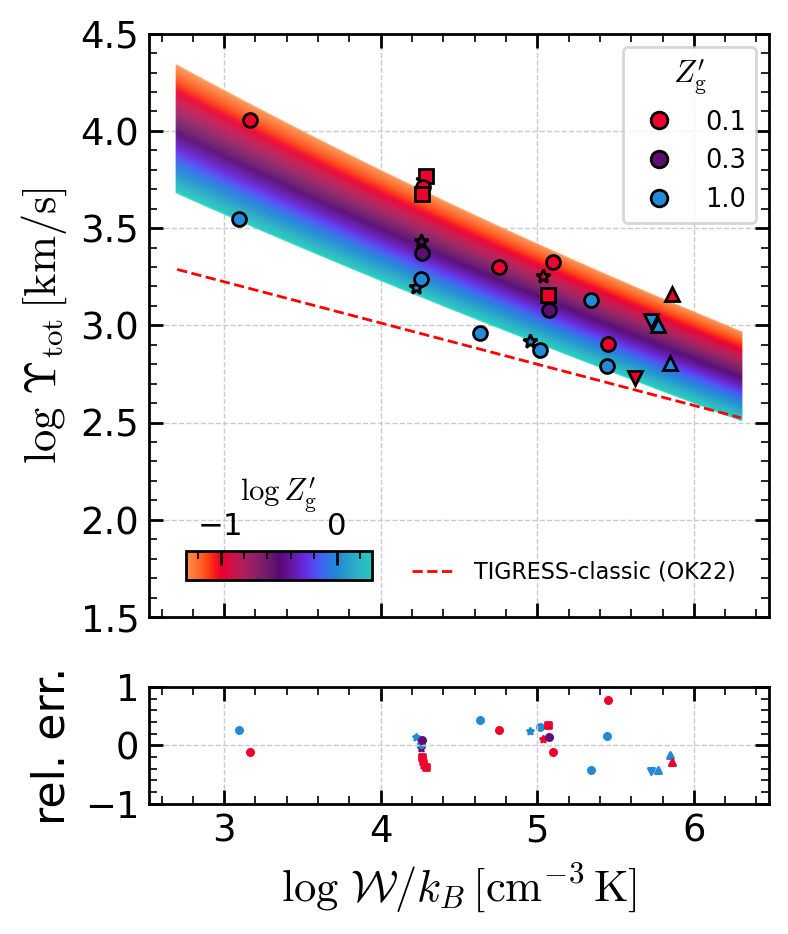

In [64]:
# Figure for total feedback yield compared with
# the model based on thermal + nonthermal (turbulent+magnetic)
fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

x1,x2=['W','Zgas']

# fitting for thermal feedback yield
yf = 'Yth'
odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset1 = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

# fitting for non-thermal feedback yield
yf = 'Ynonth'
odr_out = fit_odr(qdset,xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dset2 = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

# get total feedback yield model by summing up two
model_dset = np.log10(10**model_dset1+10**model_dset2)

# plot results
plt.sca(axes[0])
plot_fitting_mean(qdset,model_dset,x1,'Ytot',legend=1,colorbar=3)
# plt.plot(pt_df[x1],pt_df['Ytot'],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
# plt.ylim((5.e1,2.e4))
plt.ylim(1.5,4.5)

plt.sca(axes[1])
plot_fitting_mean(qdset,model_dset,x1,'Ytot',residual=True)

axes[0].set_xlabel('')
fig.axes[-1].xaxis.set_ticks_position('top')
fig.axes[-1].xaxis.set_label_position('top')
plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')


# add reference line from the previous result (Ostriker & Kim 2022 Eq 27, Figure 14)
w=model_dset.W.data
plt.sca(axes[0])
plt.plot(w, 3.86-0.212*w,ls='--',color='r',lw=1)
leg1=plt.gca().get_legend()
custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
leg2 = plt.legend(custom_lines2,['TIGRESS-classic (OK22)'],loc=4,borderpad=1,
                  fontsize=8,frameon=False)
plt.gca().add_artist(leg1)

plt.savefig(os.path.join(outdir,f'Ytot_fit2.png'),bbox_inches='tight')

In [65]:
import astropy.units as au
import astropy.constants as ac
yield_conv = ((au.cm**(-3)*au.K*ac.k_B)/(ac.M_sun/ac.kpc**2/au.yr)).to('km/s').value

In [66]:
qdset_ = qdset.to_dataset('variable')
for yf in ['Ytot','Yth','Yturb','Ymag','oYmag','dYmag']:
    qdset_[yf] = qdset_[yf.replace('Y','Pi' if 'mag' in yf else 'P')]/qdset_['sfr']*yield_conv
qdset_['Ynonth'] = (qdset_['Pturb']+qdset_['Pimag'])/qdset_['sfr']*yield_conv

Beta: [ 4.39421371 -0.28877526 -0.24014634]
Beta Std Error: [0.17855664 0.03556592 0.05584599]
Beta Covariance: [[ 2.06337681 -0.40109516  0.17269869]
 [-0.40109516  0.08186431 -0.01400413]
 [ 0.17269869 -0.01400413  0.20184154]]
Residual Variance: 0.01545160097477207
Inverse Condition #: 0.0032230031777006262
Reason(s) for Halting:
  Sum of squares convergence


Ytot
L1 : 0.2308835162164084
L2 : 0.3540017765401516
Beta: [ 4.47050301 -0.46344014 -0.49865176]
Beta Std Error: [0.11942223 0.02378568 0.03736839]
Beta Covariance: [[ 2.64531614 -0.51417644  0.22174413]
 [-0.51417644  0.10493936 -0.01799868]
 [ 0.22174413 -0.01799868  0.25900964]]
Residual Variance: 0.005391290936560247
Inverse Condition #: 0.0032232420117713797
Reason(s) for Halting:
  Sum of squares convergence
Yth
L1 : 0.14657305970028842
L2 : 0.2240903560896533
Beta: [ 3.65524674 -0.21658762  0.00410215]
Beta Std Error: [0.21581868 0.04297583 0.06737663]
Beta Covariance: [[ 1.8950984  -0.3683052   0.15941989]
 [-0.3683052   0.07514538 -0.01310309]
 [ 0.15941989 -0.01310309  0.18470227]]
Residual Variance: 0.02457798616846529
Inverse Condition #: 0.003219432822190876
Reason(s) for Halting:
  Sum of squares convergence
Yturb
L1 : 0.23622117347116564
L2 : 0.33455122008488647
Beta: [ 3.95746183 -0.21690858 -0.14962089]
Beta Std Error: [0.19772865 0.0393811  0.06180416]
Beta Covariance

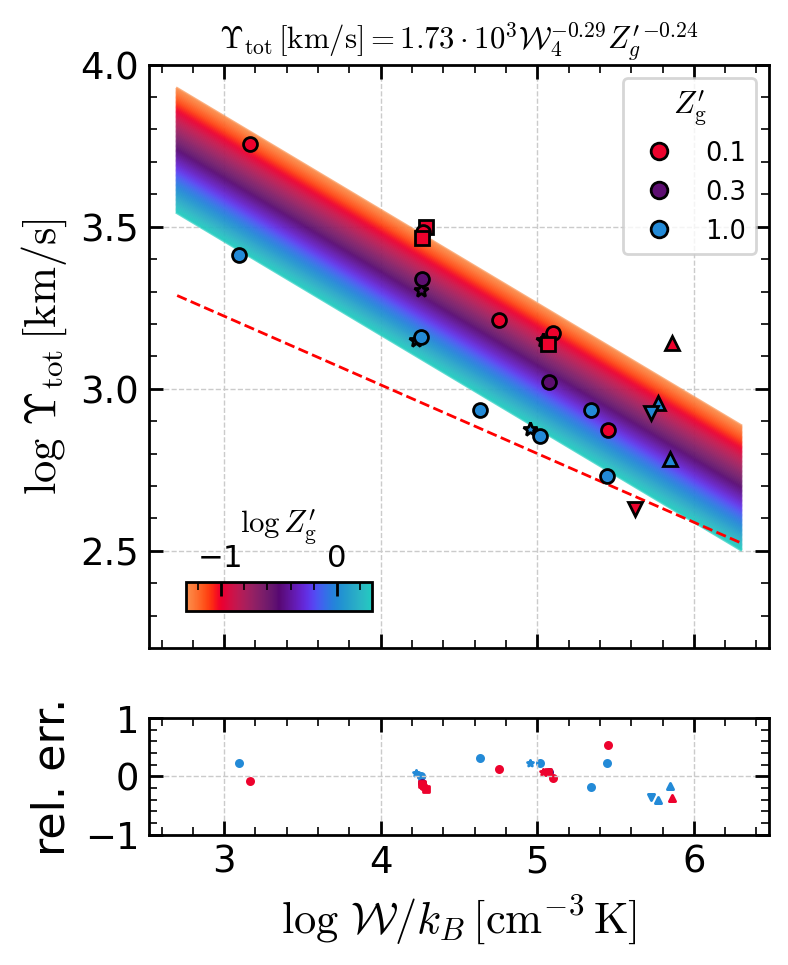

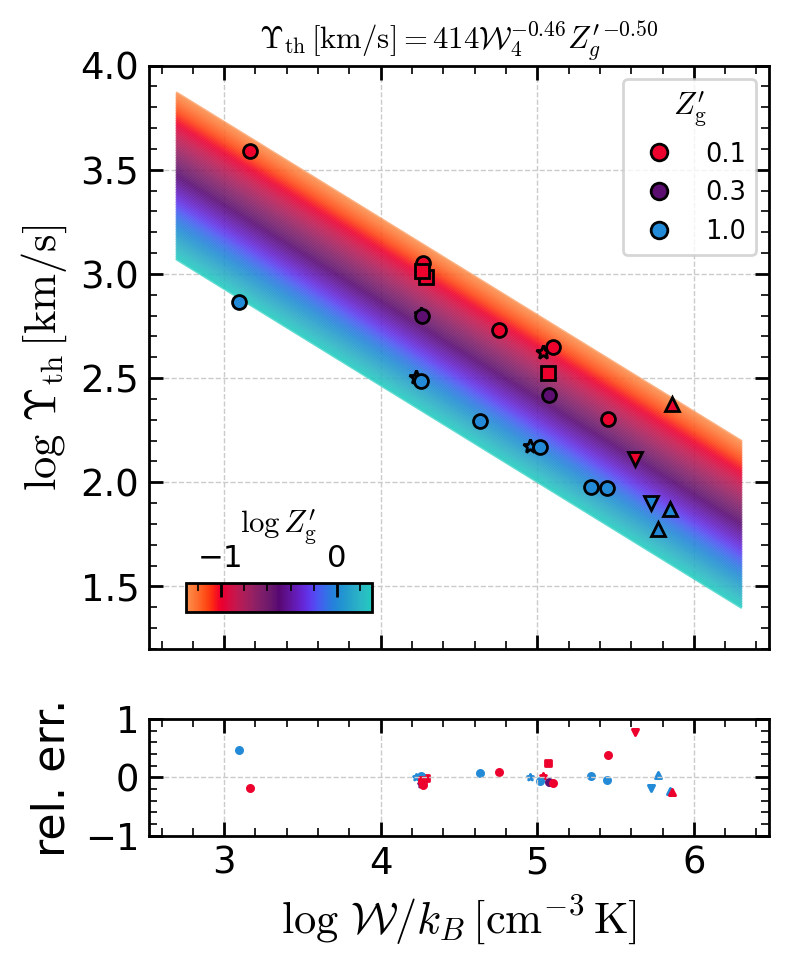

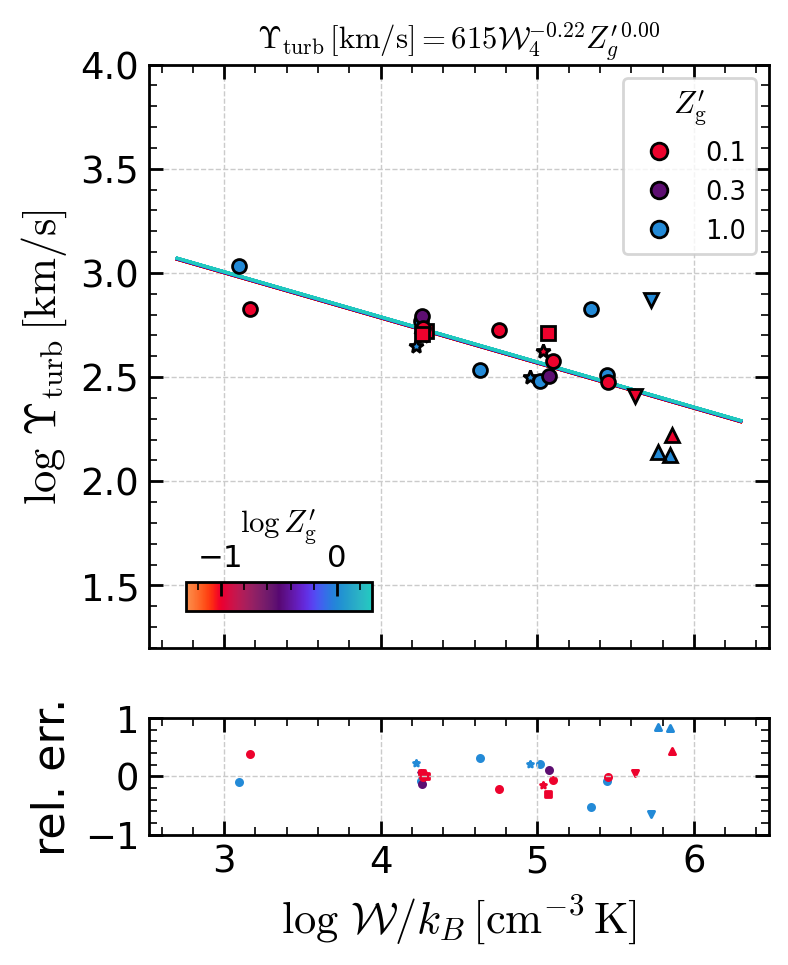

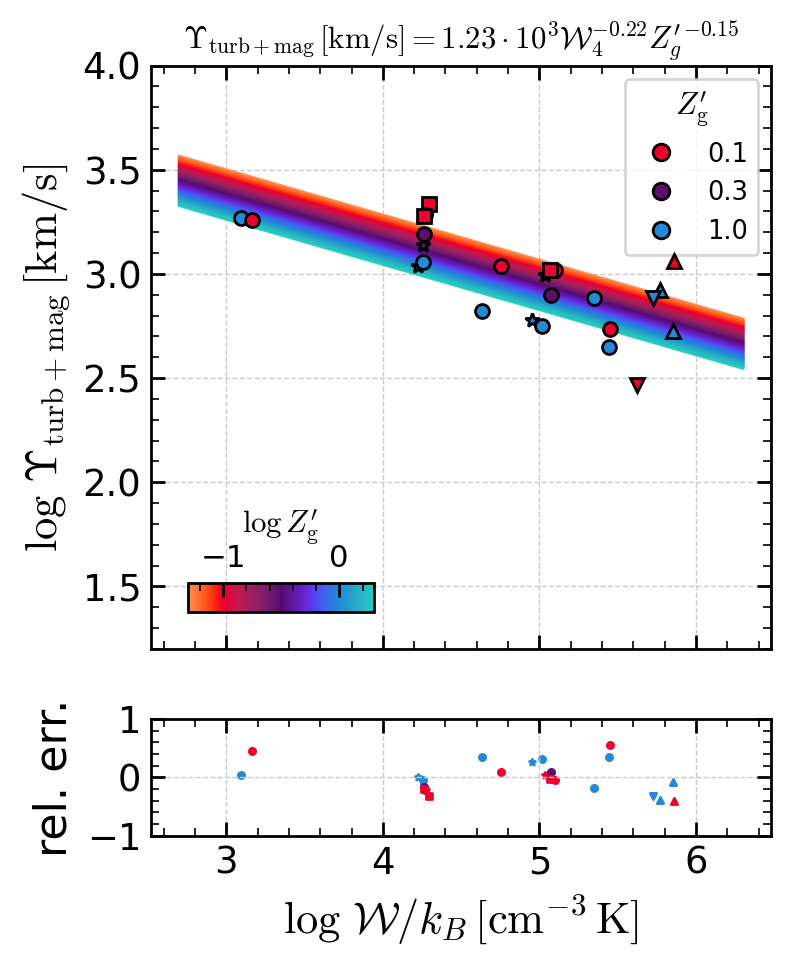

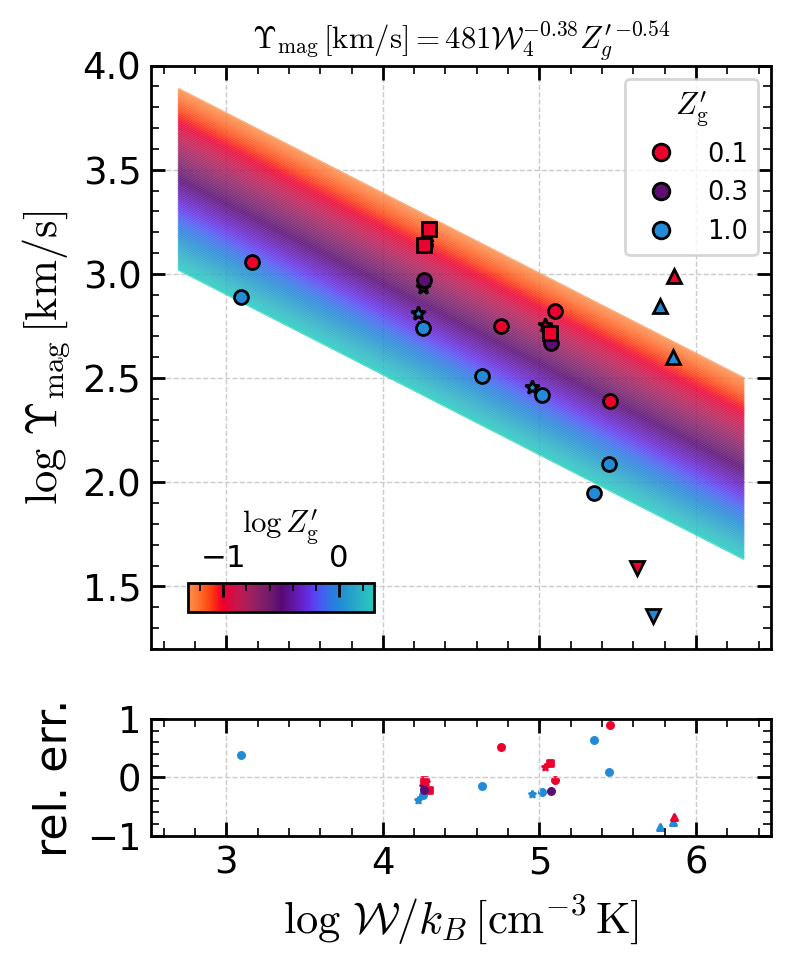

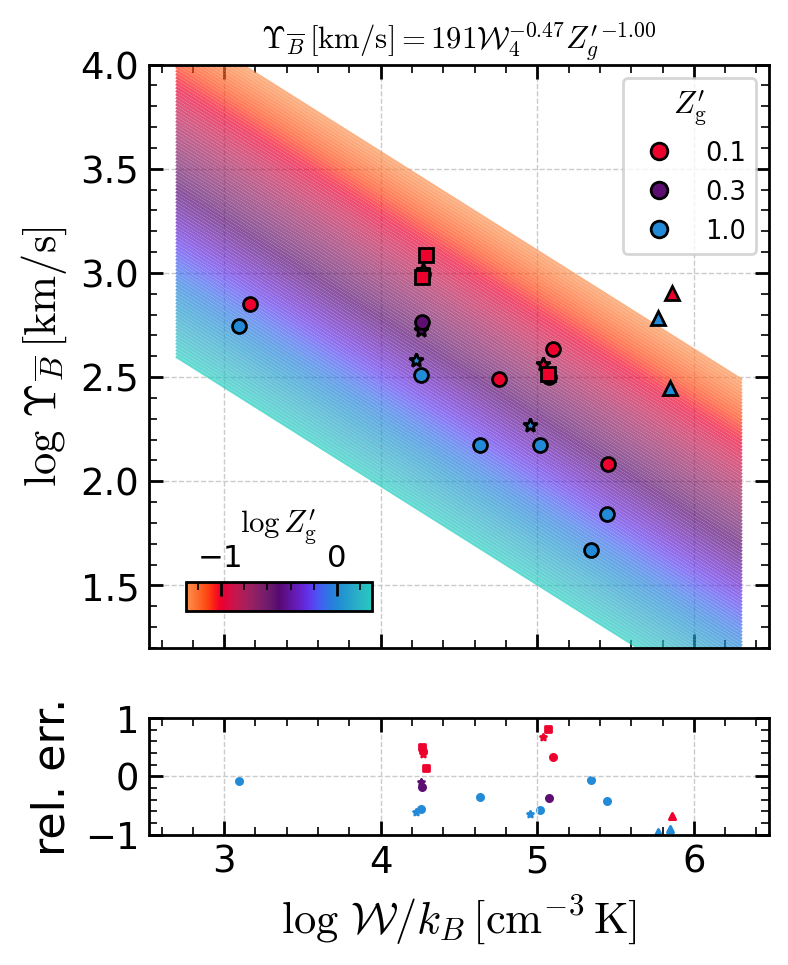

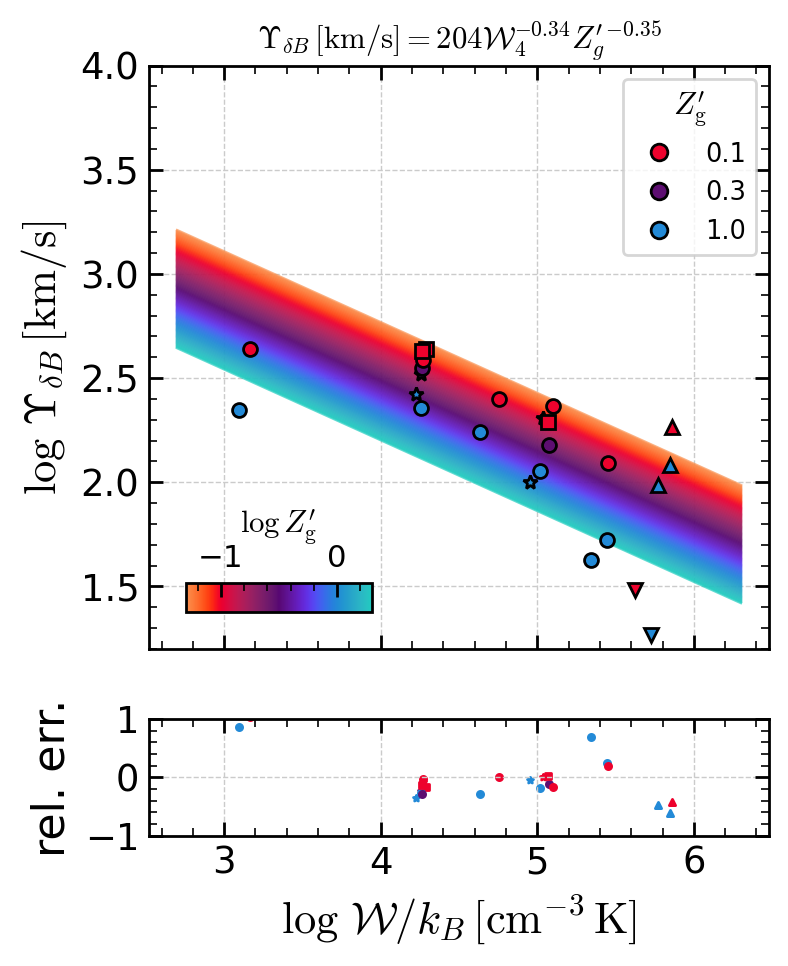

In [67]:
with plt.style.context({'savefig.bbox':'tight'}):
    # Figure for feedback yields (each component saved into each figure)
    for yf in ['Ytot','Yth','Yturb','Ynonth','Ymag','oYmag','dYmag']:
        fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

        # set field names for x-axes and yaxis
        x1,x2=['W','Zgas']

        # linear regression
        odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
        # construct model (not the x1-axis is not W and the parameter range is changed)
        model_dset = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

        # plot simulation data along with fitting result
        plt.sca(axes[0])

        # write fitting result as the axis title
        a=odr_out.beta[1]
        b=odr_out.beta[2]
        Y0=10**odr_out.beta[0]*1.e4**a
        tit=labels[yf]+f'$={scifmt(Y0)} \\mathcal{{W}}_4^{{{a:5.2f}}}{{Z_g^\\prime}}^{{{b:5.2f}}}$'
        plt.title(tit,fontsize='x-small')

        # call plotting script
        plot_fitting_mean(qdset_.to_array(),model_dset,x1,yf,legend=1,colorbar=3,model=True)
        # plot all data as grey dots
        # plt.plot(pt_df[x1],pt_df[yf],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
        plt.ylim((1.2,4.))
        if yf == 'Ytot': plt.ylim((2.2,4.))
        plt.xlabel('')

        # plot residual compared with the fitting result
        plt.sca(axes[1])
        print(yf)
        plot_fitting_mean(qdset_.to_array(),model_dset,x1,yf,residual=True,model=True)

        # decorate axis
        fig.axes[-1].xaxis.set_ticks_position('top')
        fig.axes[-1].xaxis.set_label_position('top')
        plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
        fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')

        # TIGRESS-classic
        if yf == 'Ytot':
            w=model_dset.W.data
            plt.sca(axes[0])
            plt.plot(w, 3.86-0.212*w,ls='--',color='r',lw=1)
        # save figure
        plt.savefig(os.path.join(outdir,f'{yf}_mean_fit.png'),bbox_inches=None)

Beta: [ 4.47050301 -0.46344014 -0.49865176]
Beta Std Error: [0.11942223 0.02378568 0.03736839]
Beta Covariance: [[ 2.64531614 -0.51417644  0.22174413]
 [-0.51417644  0.10493936 -0.01799868]
 [ 0.22174413 -0.01799868  0.25900964]]
Residual Variance: 0.005391290936560247
Inverse Condition #: 0.0032232420117713797
Reason(s) for Halting:
  Sum of squares convergence
Beta: [ 3.95746183 -0.21690858 -0.14962089]
Beta Std Error: [0.19772865 0.0393811  0.06180416]
Beta Covariance: [[ 1.93375651 -0.37587129  0.16210213]
 [-0.37587129  0.07670759 -0.01320233]
 [ 0.16210213 -0.01320233  0.18892877]]
Residual Variance: 0.020217963041295153
Inverse Condition #: 0.00322246259716918
Reason(s) for Halting:
  Sum of squares convergence


L1 : 0.21583573413213336
L2 : 0.3379270348117972


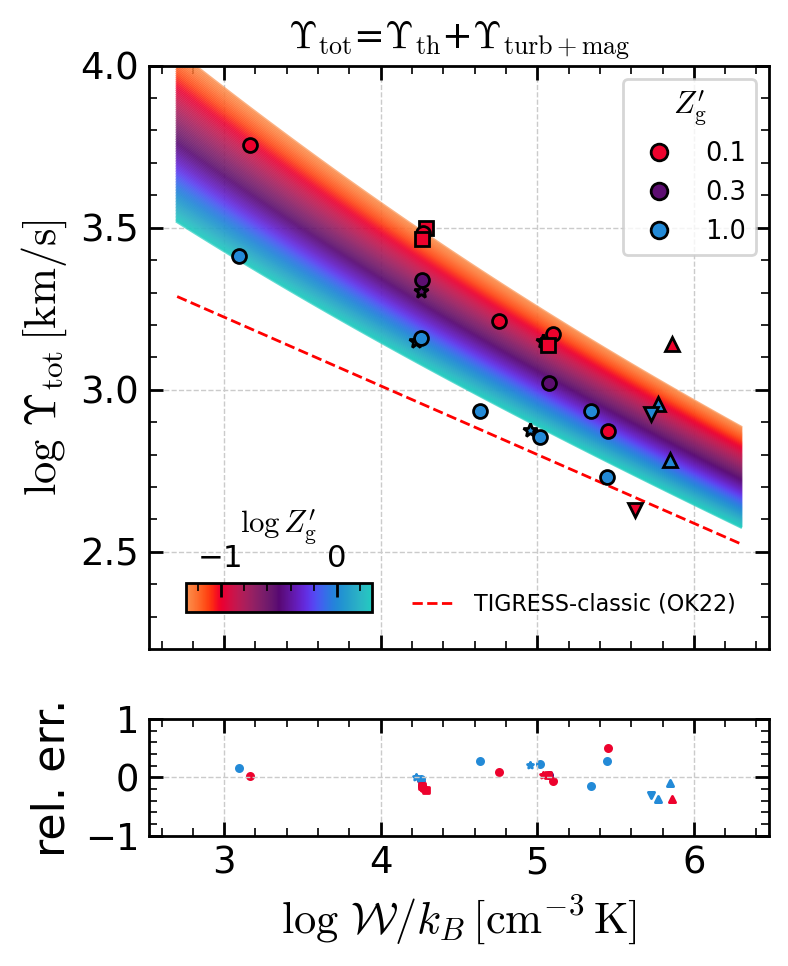

In [68]:
with plt.style.context({'savefig.bbox':'tight'}):
    # Figure for total feedback yield compared with
    # the model based on thermal + nonthermal (turbulent+magnetic)
    fig,axes = plt.subplots(2,1,sharex='col',figsize=(4,5),gridspec_kw=dict(height_ratios=[1,0.2]))

    x1,x2=['W','Zgas']

    # fitting for thermal feedback yield
    yf = 'Yth'
    odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
    # construct model (not the x1-axis is not W and the parameter range is changed)
    model_dset1 = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

    # fitting for non-thermal feedback yield
    yf = 'Ynonth'
    odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
    # construct model (not the x1-axis is not W and the parameter range is changed)
    model_dset2 = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

    # get total feedback yield model by summing up two
    model_dset = np.log10(10**model_dset1+10**model_dset2)

    # plot results
    plt.sca(axes[0])
    plot_fitting_mean(qdset_.to_array(),model_dset,x1,'Ytot',legend=1,colorbar=3)
    # plt.plot(pt_df[x1],pt_df['Ytot'],'.',color='grey',alpha=0.1,mew=0,zorder=-1)
    # plt.ylim((5.e1,2.e4))
    plt.ylim(2.2,4.)
    tit=labels['Ytot'][:-16]+'='+labels['Yth'][:-16]+'+'+labels['Ynonth'][:-16]
    plt.title(tit,fontsize='small')

    plt.sca(axes[1])
    plot_fitting_mean(qdset_.to_array(),model_dset,x1,'Ytot',residual=True)

    axes[0].set_xlabel('')
    fig.axes[-1].xaxis.set_ticks_position('top')
    fig.axes[-1].xaxis.set_label_position('top')
    plt.setp(fig.axes[-1].get_xticklabels(),'fontsize','x-small')
    fig.axes[-1].set_xlabel(fig.axes[-1].get_xlabel(),fontsize='x-small')


    # add reference line from the previous result (Ostriker & Kim 2022 Eq 27, Figure 14)
    w=model_dset.W.data
    plt.sca(axes[0])
    plt.plot(w, 3.86-0.212*w,ls='--',color='r',lw=1)
    leg1=plt.gca().get_legend()
    custom_lines2 = [Line2D([0], [0], ls = '--', color='r', lw=1)]
    leg2 = plt.legend(custom_lines2,['TIGRESS-classic (OK22)'],loc=4,borderpad=1,
                    fontsize=8,frameon=False)
    plt.gca().add_artist(leg1)

    plt.savefig(os.path.join(outdir,f'Ytot_mean_fit2.png'),bbox_inches=None)

In [41]:
# fitting for thermal feedback yield
yf = 'Yturb'
odr_out = fit_odr(qdset_.to_array(),xf1=x1,xf2=x2,yf=yf)
# construct model (not the x1-axis is not W and the parameter range is changed)
model_dsett = get_model_odr(odr_out,Zmin=Zmin,Zmax=Zmax,Wmin=Wmin,Wmax=Wmax,dims=[x2,x1])

Beta: [ 3.65524674 -0.21658762  0.00410215]
Beta Std Error: [0.21581868 0.04297583 0.06737663]
Beta Covariance: [[ 1.8950984  -0.3683052   0.15941989]
 [-0.3683052   0.07514538 -0.01310309]
 [ 0.15941989 -0.01310309  0.18470227]]
Residual Variance: 0.02457798616846529
Inverse Condition #: 0.003219432822190876
Reason(s) for Halting:
  Sum of squares convergence


In [42]:
model_dset = np.log10(10**model_dset1+10**model_dset2)

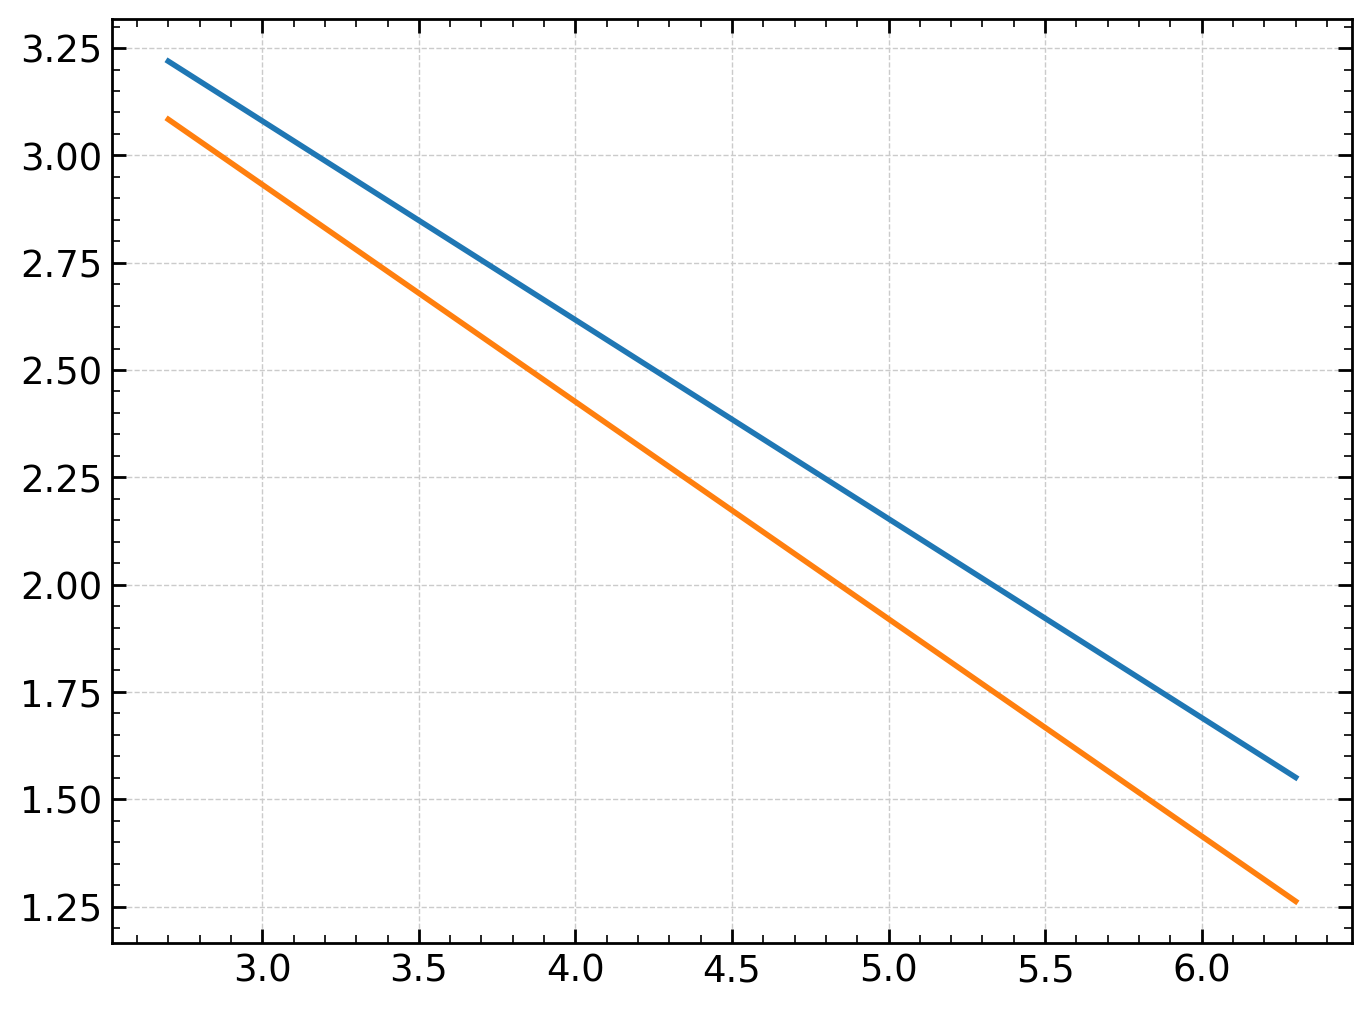

In [27]:
plt.plot(model_dset.W,model_dset1.interp(Zgas=0))
plt.plot(w,(4.45-0.506*w))

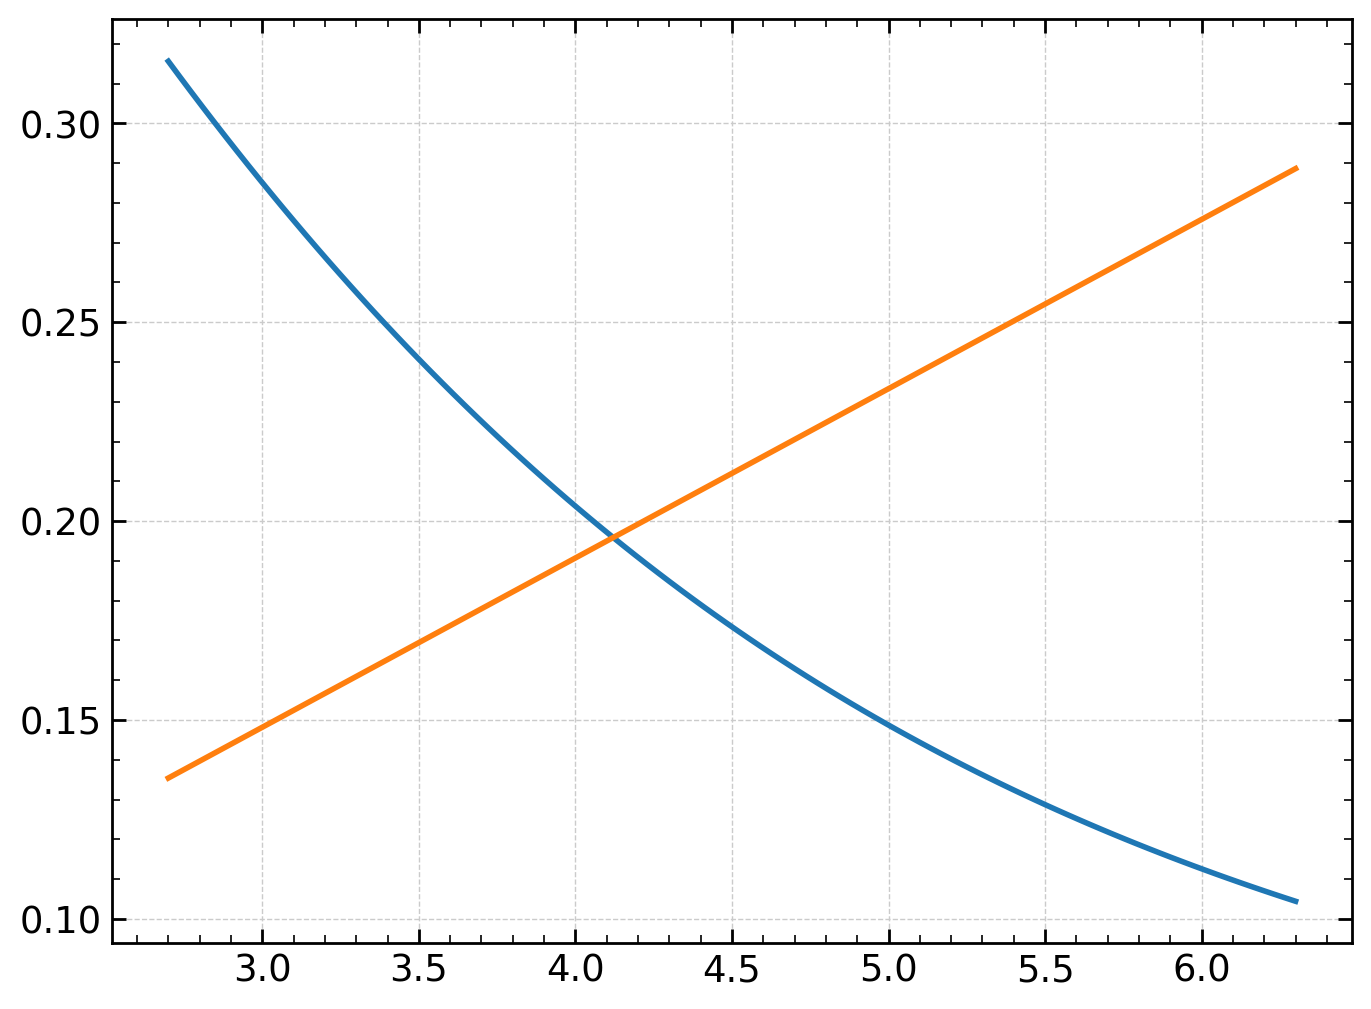

In [28]:
plt.plot(model_dset.W,model_dset.interp(Zgas=0)-(3.86-0.212*w))
plt.plot(model_dset.W,model_dset1.interp(Zgas=0)-(4.45-0.506*w))
# plt.plot(w,3.86-0.212*w)